## Regression with Basic/Advanced Models

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### data

In [2]:
df = pd.read_excel("btc_eth.xlsx")

In [3]:
df.head(16)

,Date,BTC_Open,ETH_Open
0,2020-01-05,8628.6,206.23
1,2020-01-06,9454.5,231.80
2,2020-01-07,9135.9,225.61
3,2020-01-08,11333.2,346.48
4,2020-01-09,11644.2,433.89
5,2020-01-10,10776.6,359.50
6,2020-01-11,13795.5,386.36
7,2020-01-12,19697.8,616.78
8,2020-02-05,8821.6,212.00
9,2020-02-06,10190.7,248.01


The dataset contains daily opening values of Bitcoin and Ethereum cryptocurrencies. Each month has values between the 5th and 12th days. The dataset contains data for 2020 and 2021.

In [4]:
df.shape

(156, 3)

In [5]:
df.dtypes

Date        datetime64[ns]
BTC_Open           float64
ETH_Open           float64
dtype: object

In [6]:
df = df.drop("Date",axis = 1)

In our study, the date feature has been omitted because we will not do any time-dependent operations.

In [7]:
df.columns

Index(['BTC_Open', 'ETH_Open'], dtype='object')

In [8]:
df.columns = ["btc","eth"]

<AxesSubplot:xlabel='btc', ylabel='eth'>

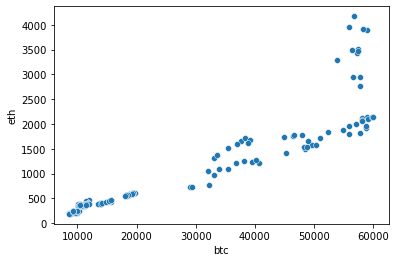

In [9]:
sns.scatterplot(x = "btc", y = "eth", data = df)

### Linear Regression

In [10]:
X = df["btc"].values.reshape(-1,1)
y = df["eth"]

In our case, we just have a single column of data that is a single future. So thats why we have to take the array that is thoso values and then reshape it. 

.reshape(-1,1): The criterion to satisfy for providing the new shape is that 'The new shape should be compatible with the original shape'
numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)). It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria.

If we dont reshape it, it ll give this error: Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, random_state = 101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [16]:
lr_preds = lr_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mean_absolute_error(y_test, lr_preds),np.sqrt(mean_squared_error(y_test, lr_preds))

(194.49027320793752, 278.10454447961916)

<AxesSubplot:xlabel='btc', ylabel='eth'>

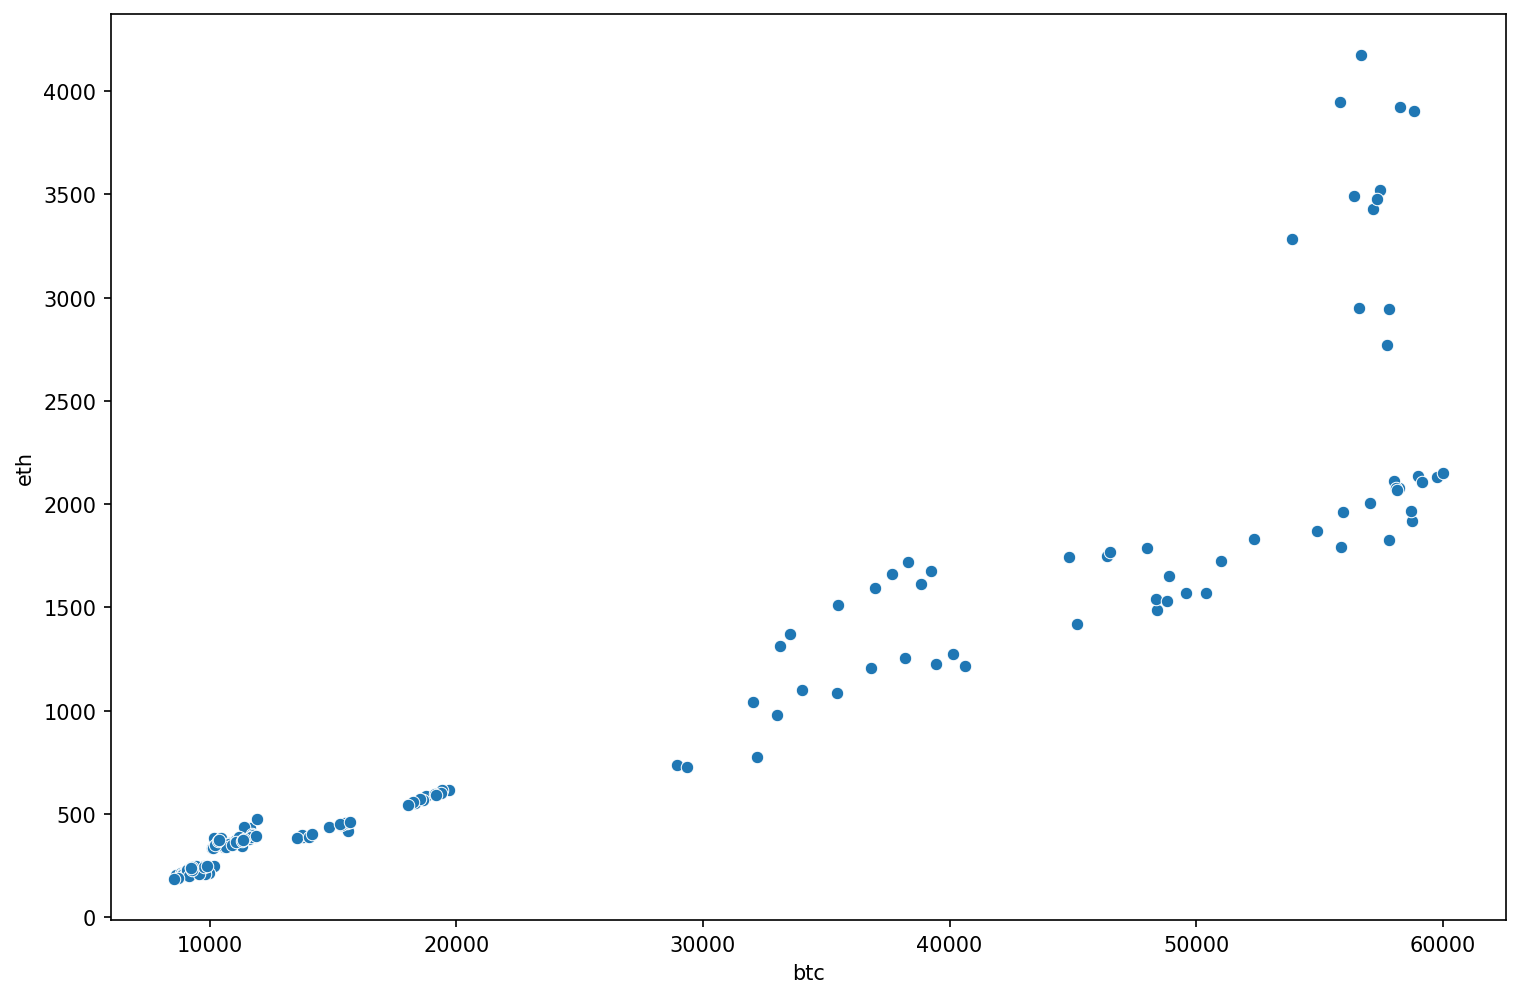

In [19]:
plt.figure(figsize = (12,8),dpi = 150)
sns.scatterplot(x = "btc", y = "eth", data = df)

In [20]:
y_test,lr_preds

(80      187.77
 106     774.54
 116    1042.48
 129    2112.41
 32      206.59
 77      365.25
 39      567.84
 91      379.03
 139    2080.20
 134    1962.44
 41      240.27
 61      341.66
 16      213.96
 96      735.87
 65      246.19
 33      243.37
 4       433.89
 1       231.80
 78      444.38
 84      367.89
 141    1275.87
 101     729.00
 108    1488.80
 53      340.59
 Name: eth, dtype: float64,
 array([ 184.42680598, 1300.82054772, 1292.37214206, 2528.97598703,
         190.92850858,  294.65589136,  656.58082996,  310.69120328,
        2532.80751748, 2431.4837656 ,  226.94013517,  276.43589314,
         195.30740053, 1146.55028063,  233.93208328,  234.7079087 ,
         322.77123345,  218.54884549,  498.10777853,  260.68616113,
        1679.53758499, 1165.96971447, 2073.28088516,  273.11840653]))

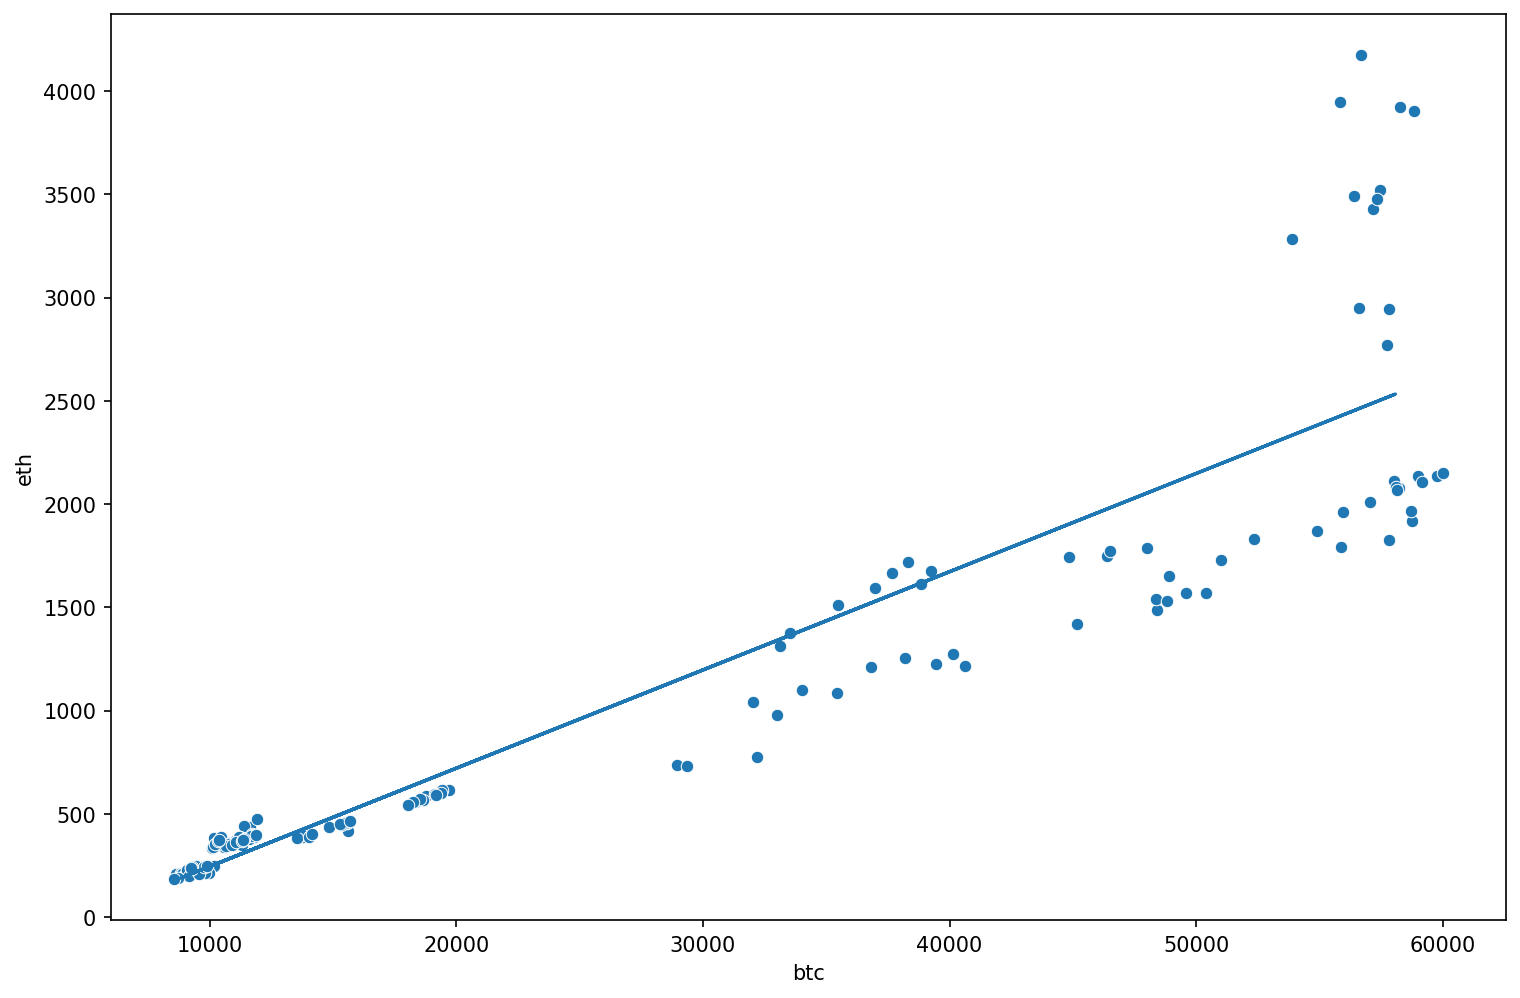

In [21]:
plt.figure(figsize = (12,8),dpi = 150)
sns.scatterplot(x = "btc", y = "eth", data = df)
plt.plot(X_test,lr_preds)

In [22]:
x_range = np.arange(0,60000,100)

In [23]:
our_preds = lr_model.predict(x_range.reshape(-1,1))

Here we just create x_range to fill the x-axis in the graph. our_preds are the eth prices to be estimated when our model is given this 0 to 60000 incremental btc price range instead of X_test. So let's observe the difference between the predictions using lr_preds and our_preds. (One is making an estimation using an increasing interval and the other using X_test data, but the model is the same) Looking at the graph, it is seen that they are the same. 

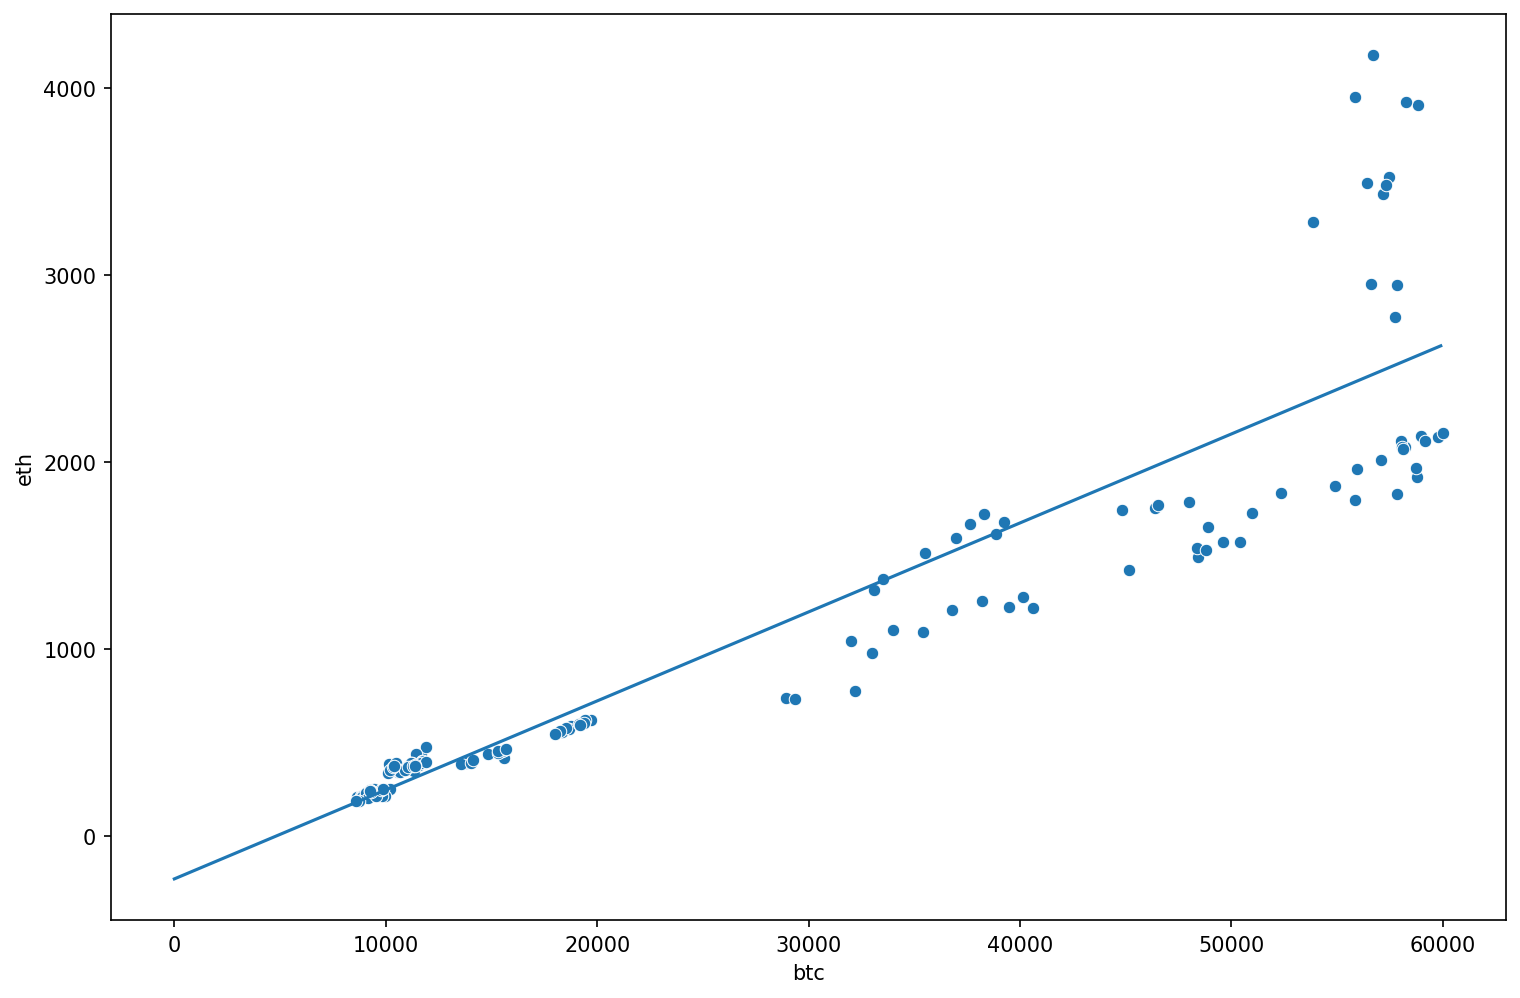

In [24]:
plt.figure(figsize = (12,8),dpi = 150)
sns.scatterplot(x = "btc", y = "eth", data = df)
plt.plot(x_range,our_preds)

Since we will apply what we have done in linear regression in other methods, we combine the important steps in a function.

In [25]:
def runn(model,X_train,X_test,y_train, y_test):
    
    #model and predict
    model.fit(X_train,y_train)    
    predictions = model.predict(X_test)
    #error metrics
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    mae = mean_absolute_error(y_test,predictions)
    print("RMSE : {}".format(rmse))
    print("MAE : {}".format(rmse))
    #plotting
    x_range = np.arange(0,60000,100)
    our_preds = model.predict(x_range.reshape(-1,1))
    plt.figure(figsize = (12,8),dpi = 200)
    sns.scatterplot(x = "btc", y = "eth", data = df, color = "black")
    plt.plot(x_range,our_preds)
    

### Polinomial Regression

In [26]:
from sklearn.pipeline import make_pipeline

In [27]:
from sklearn.preprocessing import PolynomialFeatures

Pipeline allows you to have one class .fit() call that performs both the poly feature step, and training the model step. 

In [28]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

RMSE : 246.37786759563022
MAE : 246.37786759563022


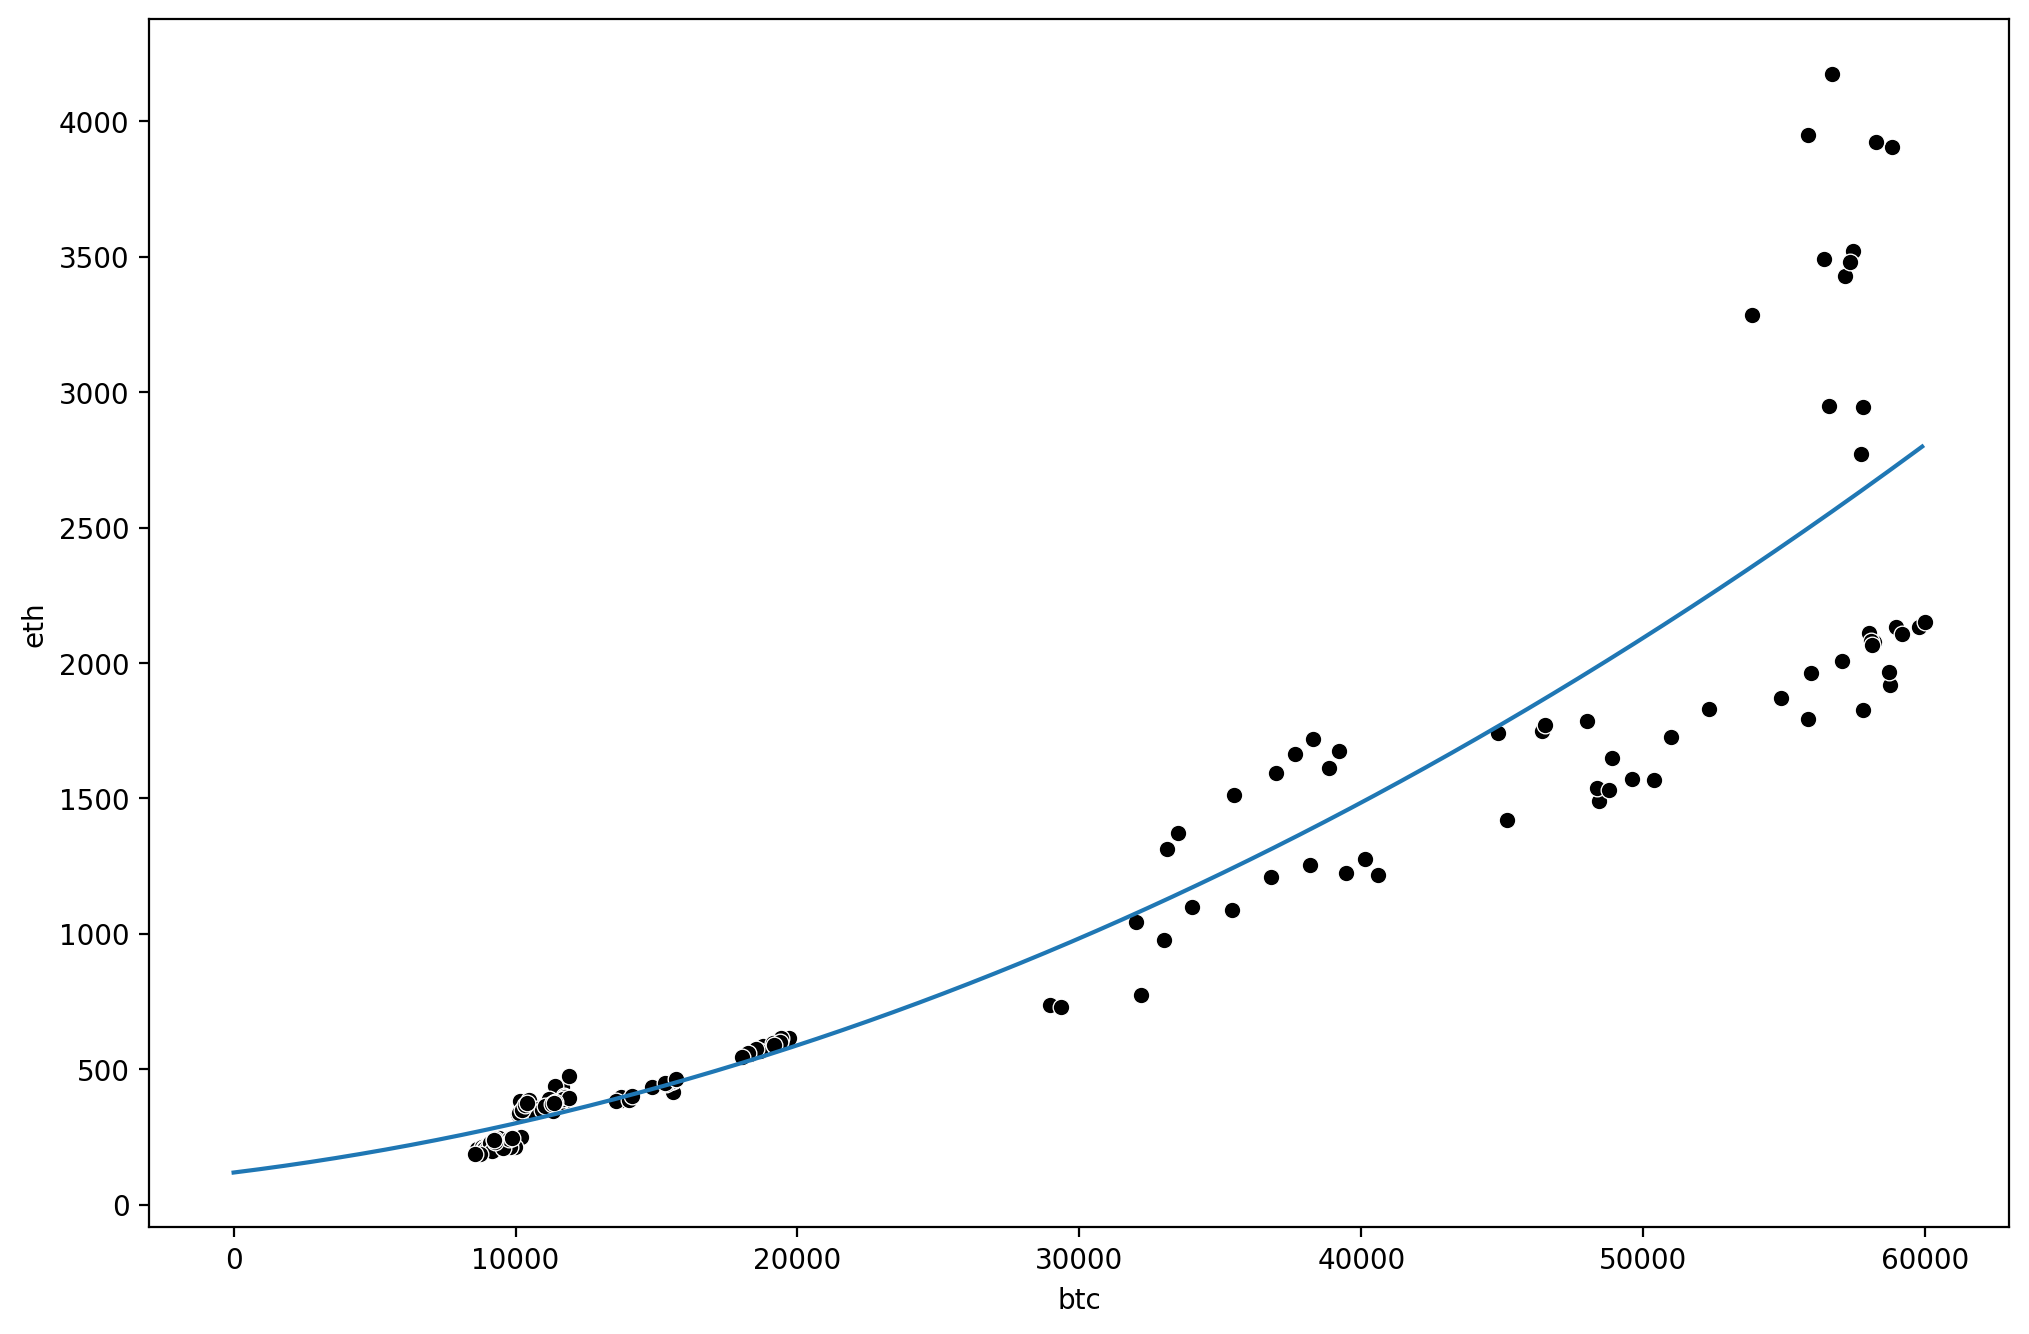

In [29]:
runn(pipe,X_train,X_test,y_train,y_test)

We can use the for loop to find the best degree.

RMSE : 247.1532932416574
MAE : 247.1532932416574
RMSE : 245.33075584828694
MAE : 245.33075584828694
RMSE : 251.24723475932623
MAE : 251.24723475932623
RMSE : 283.0472997998114
MAE : 283.0472997998114


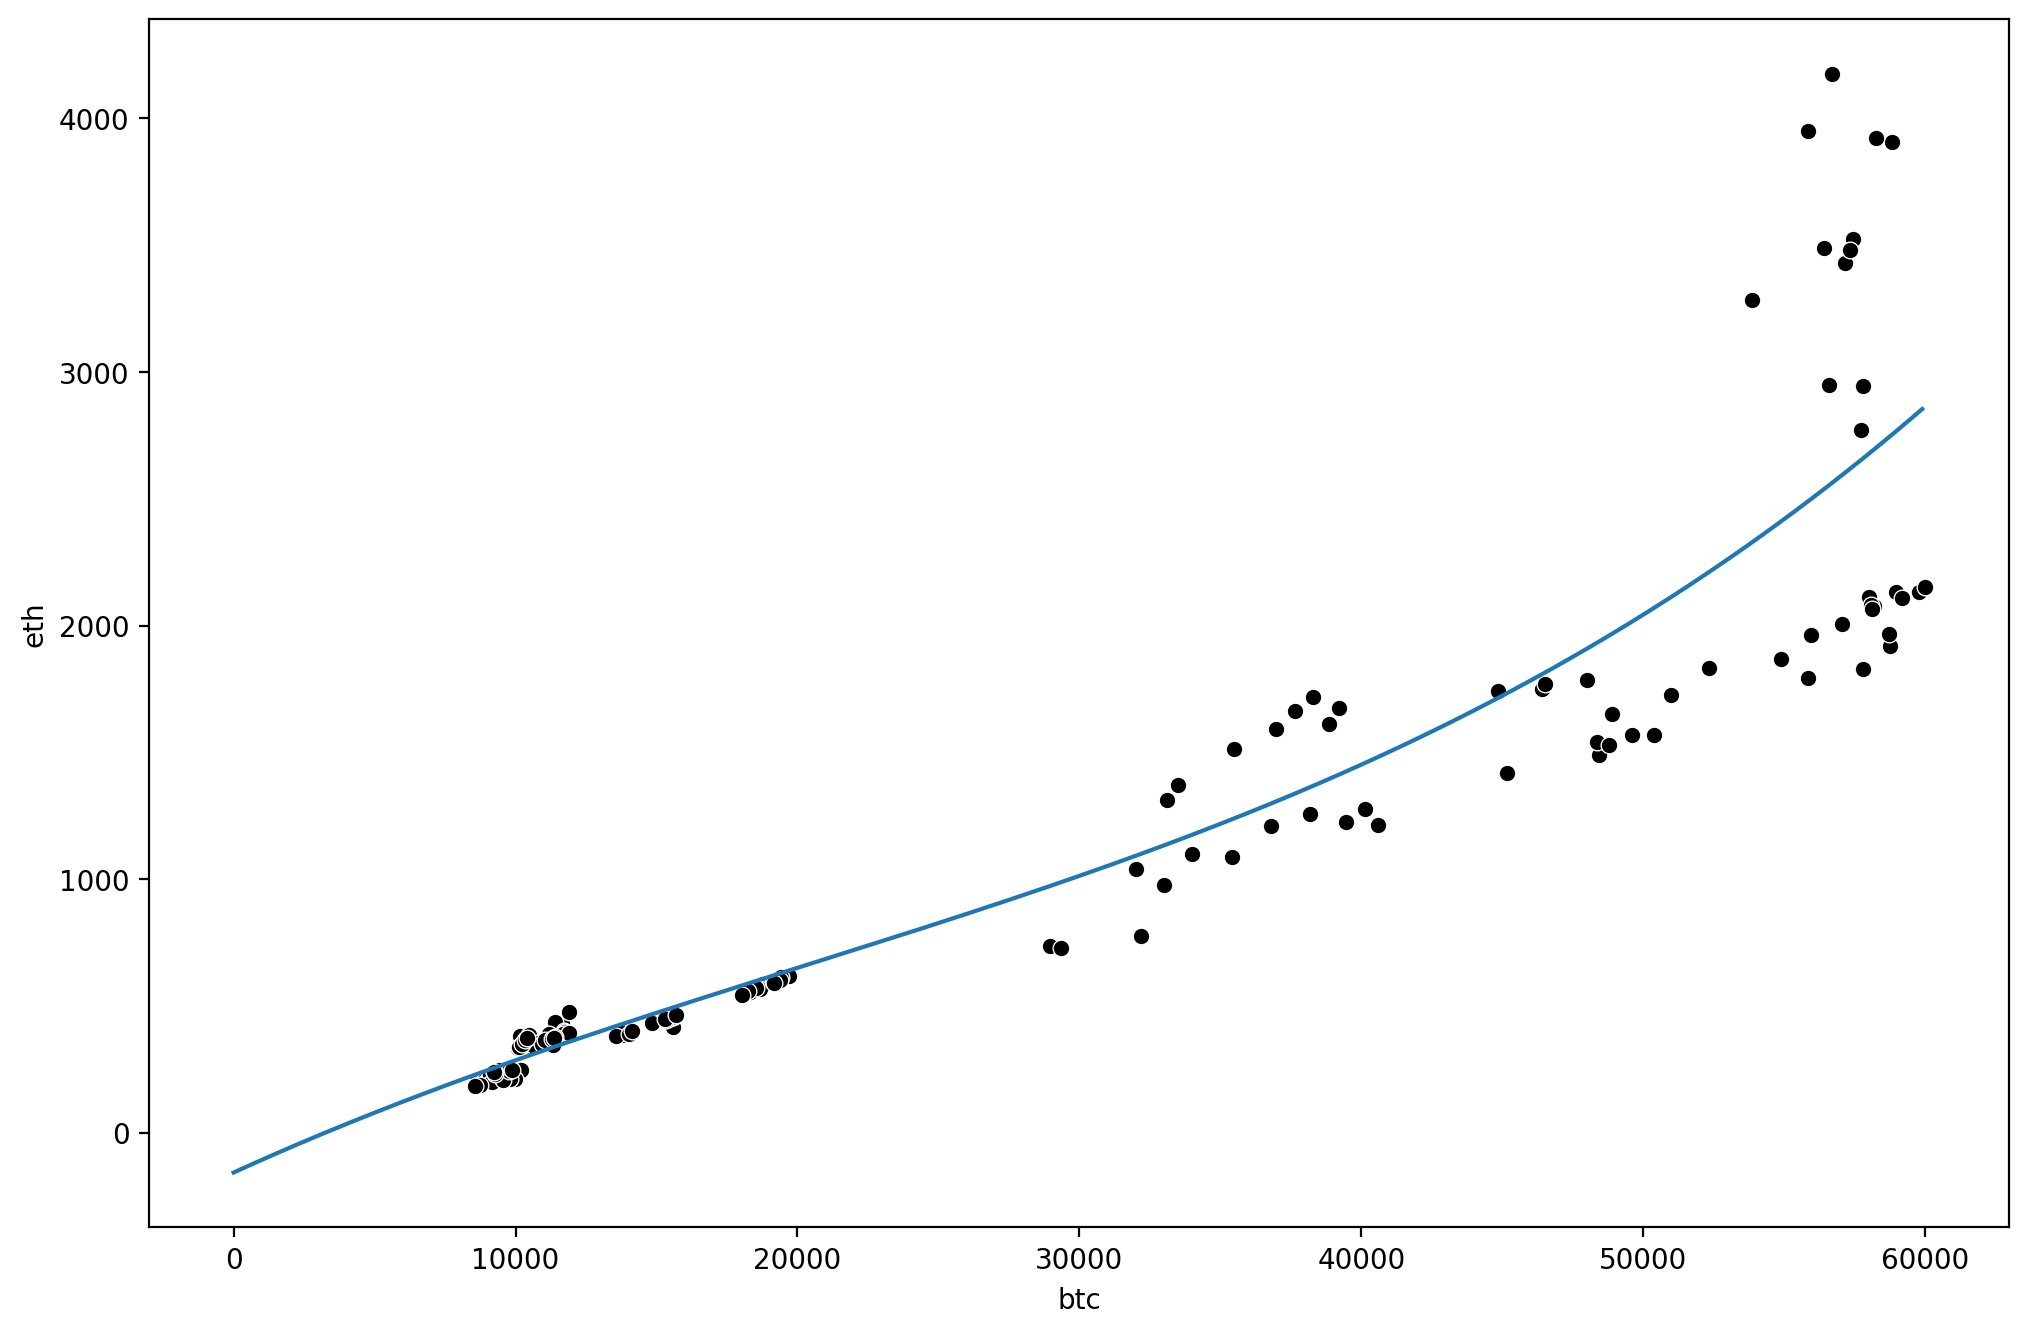

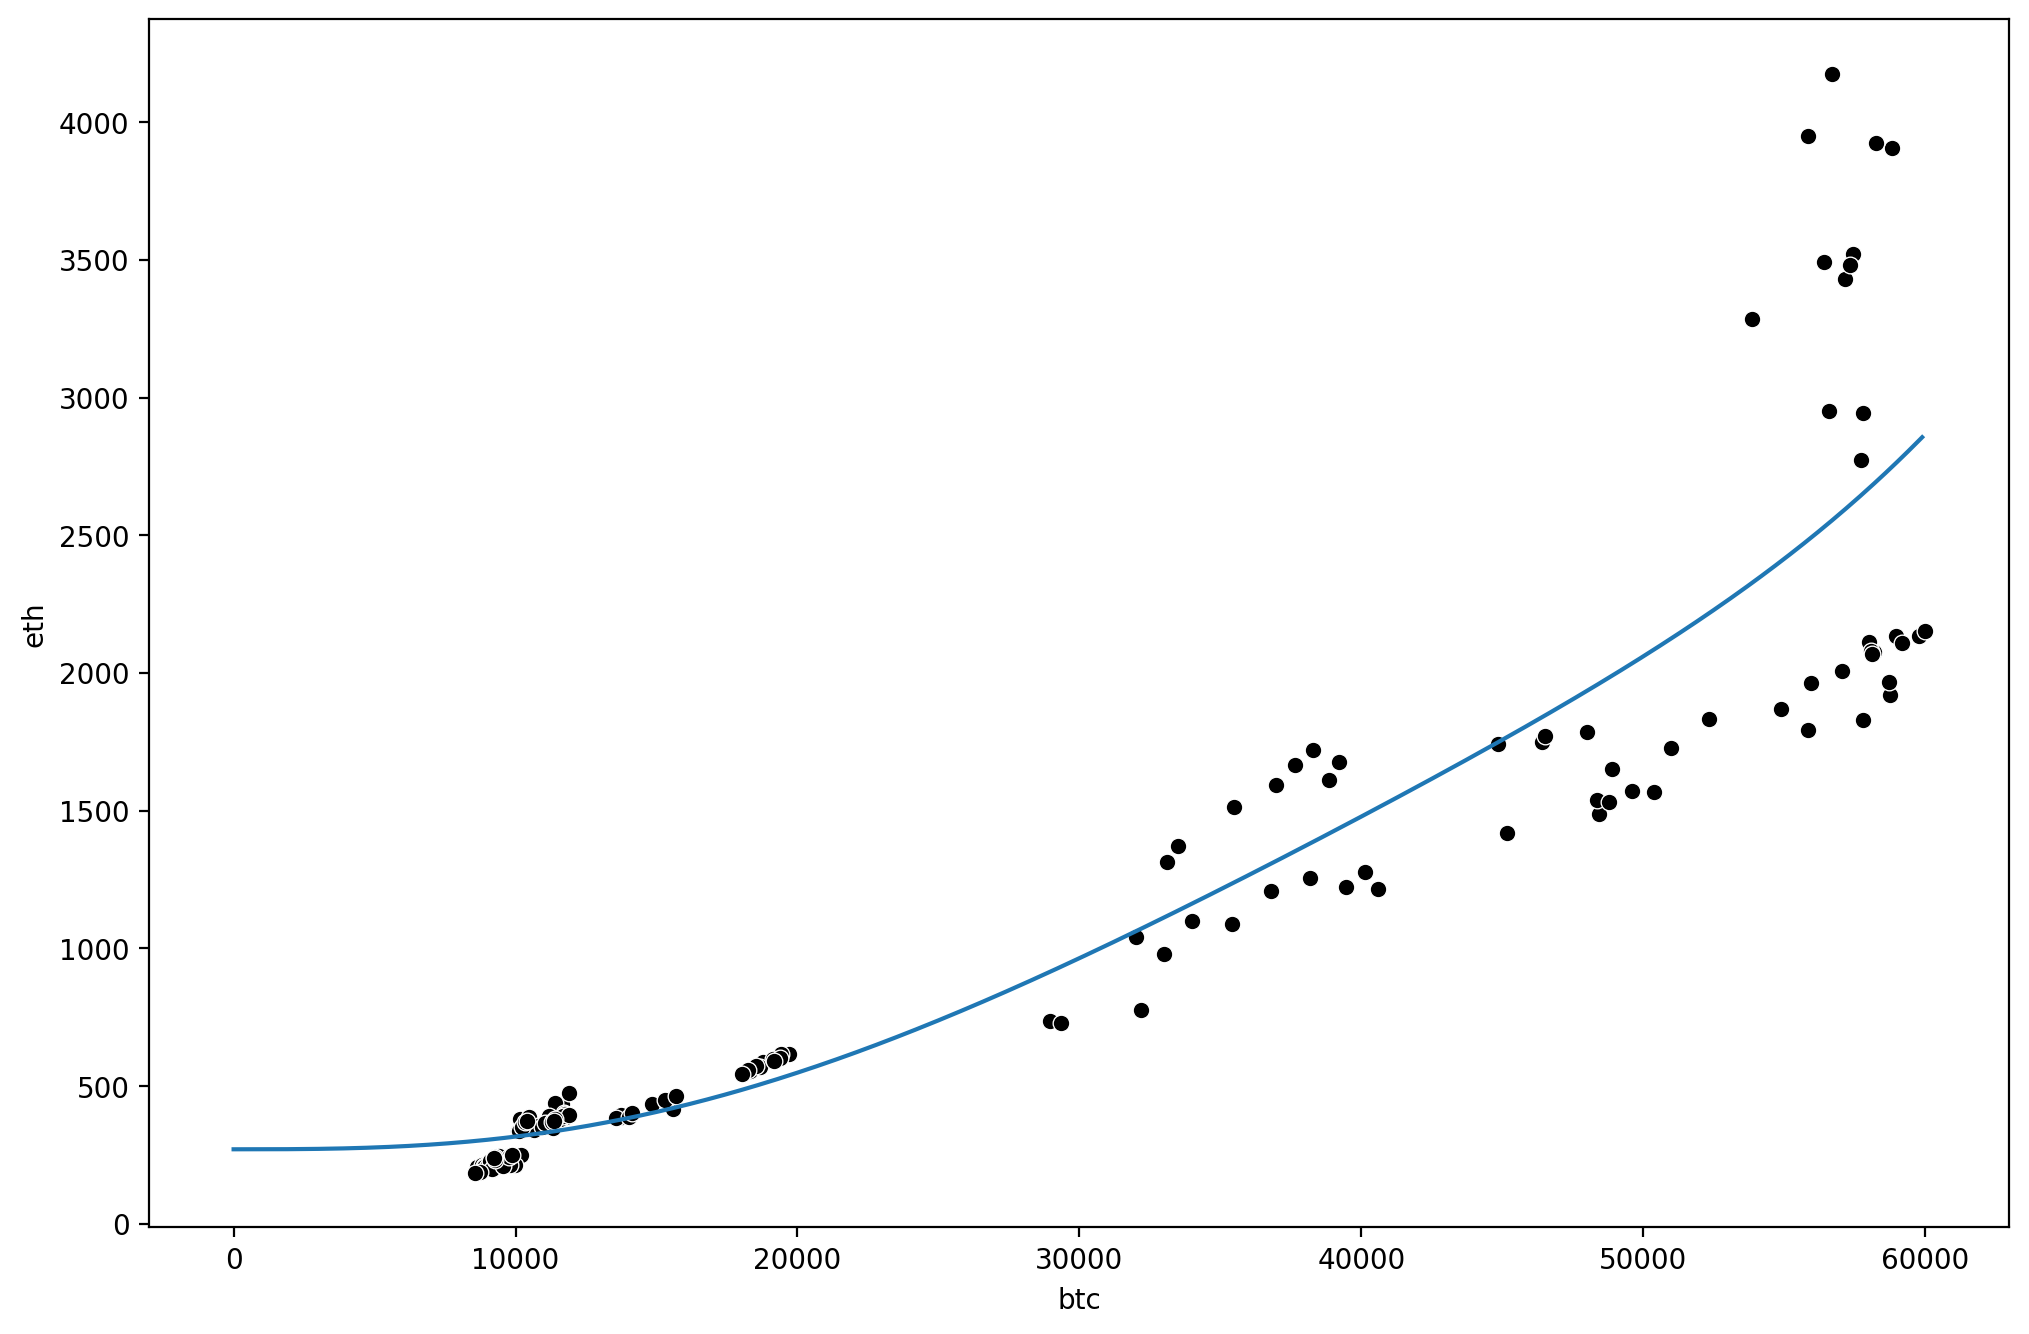

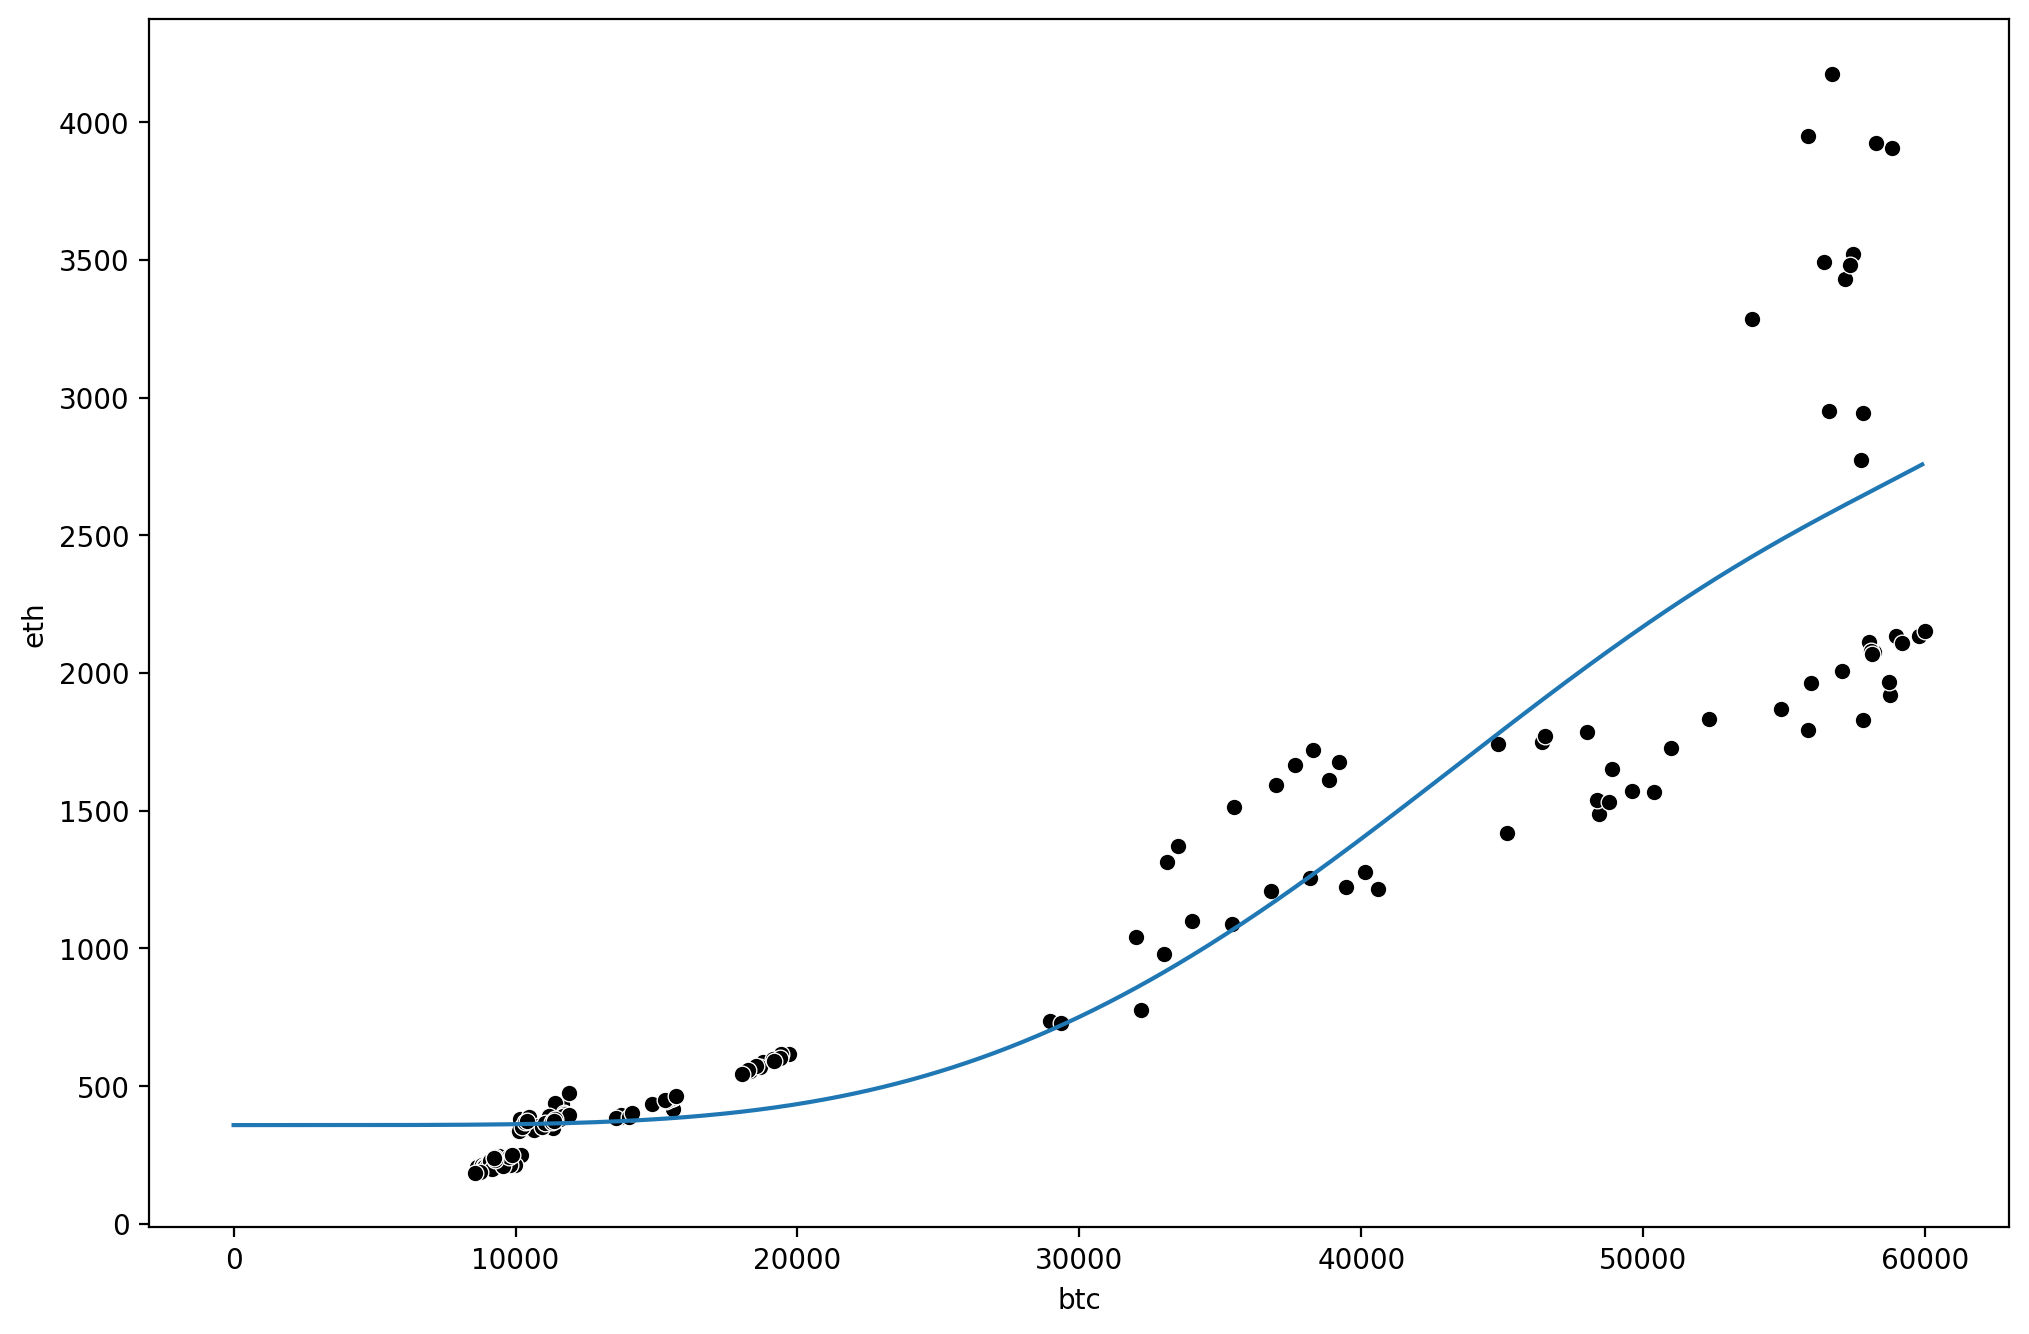

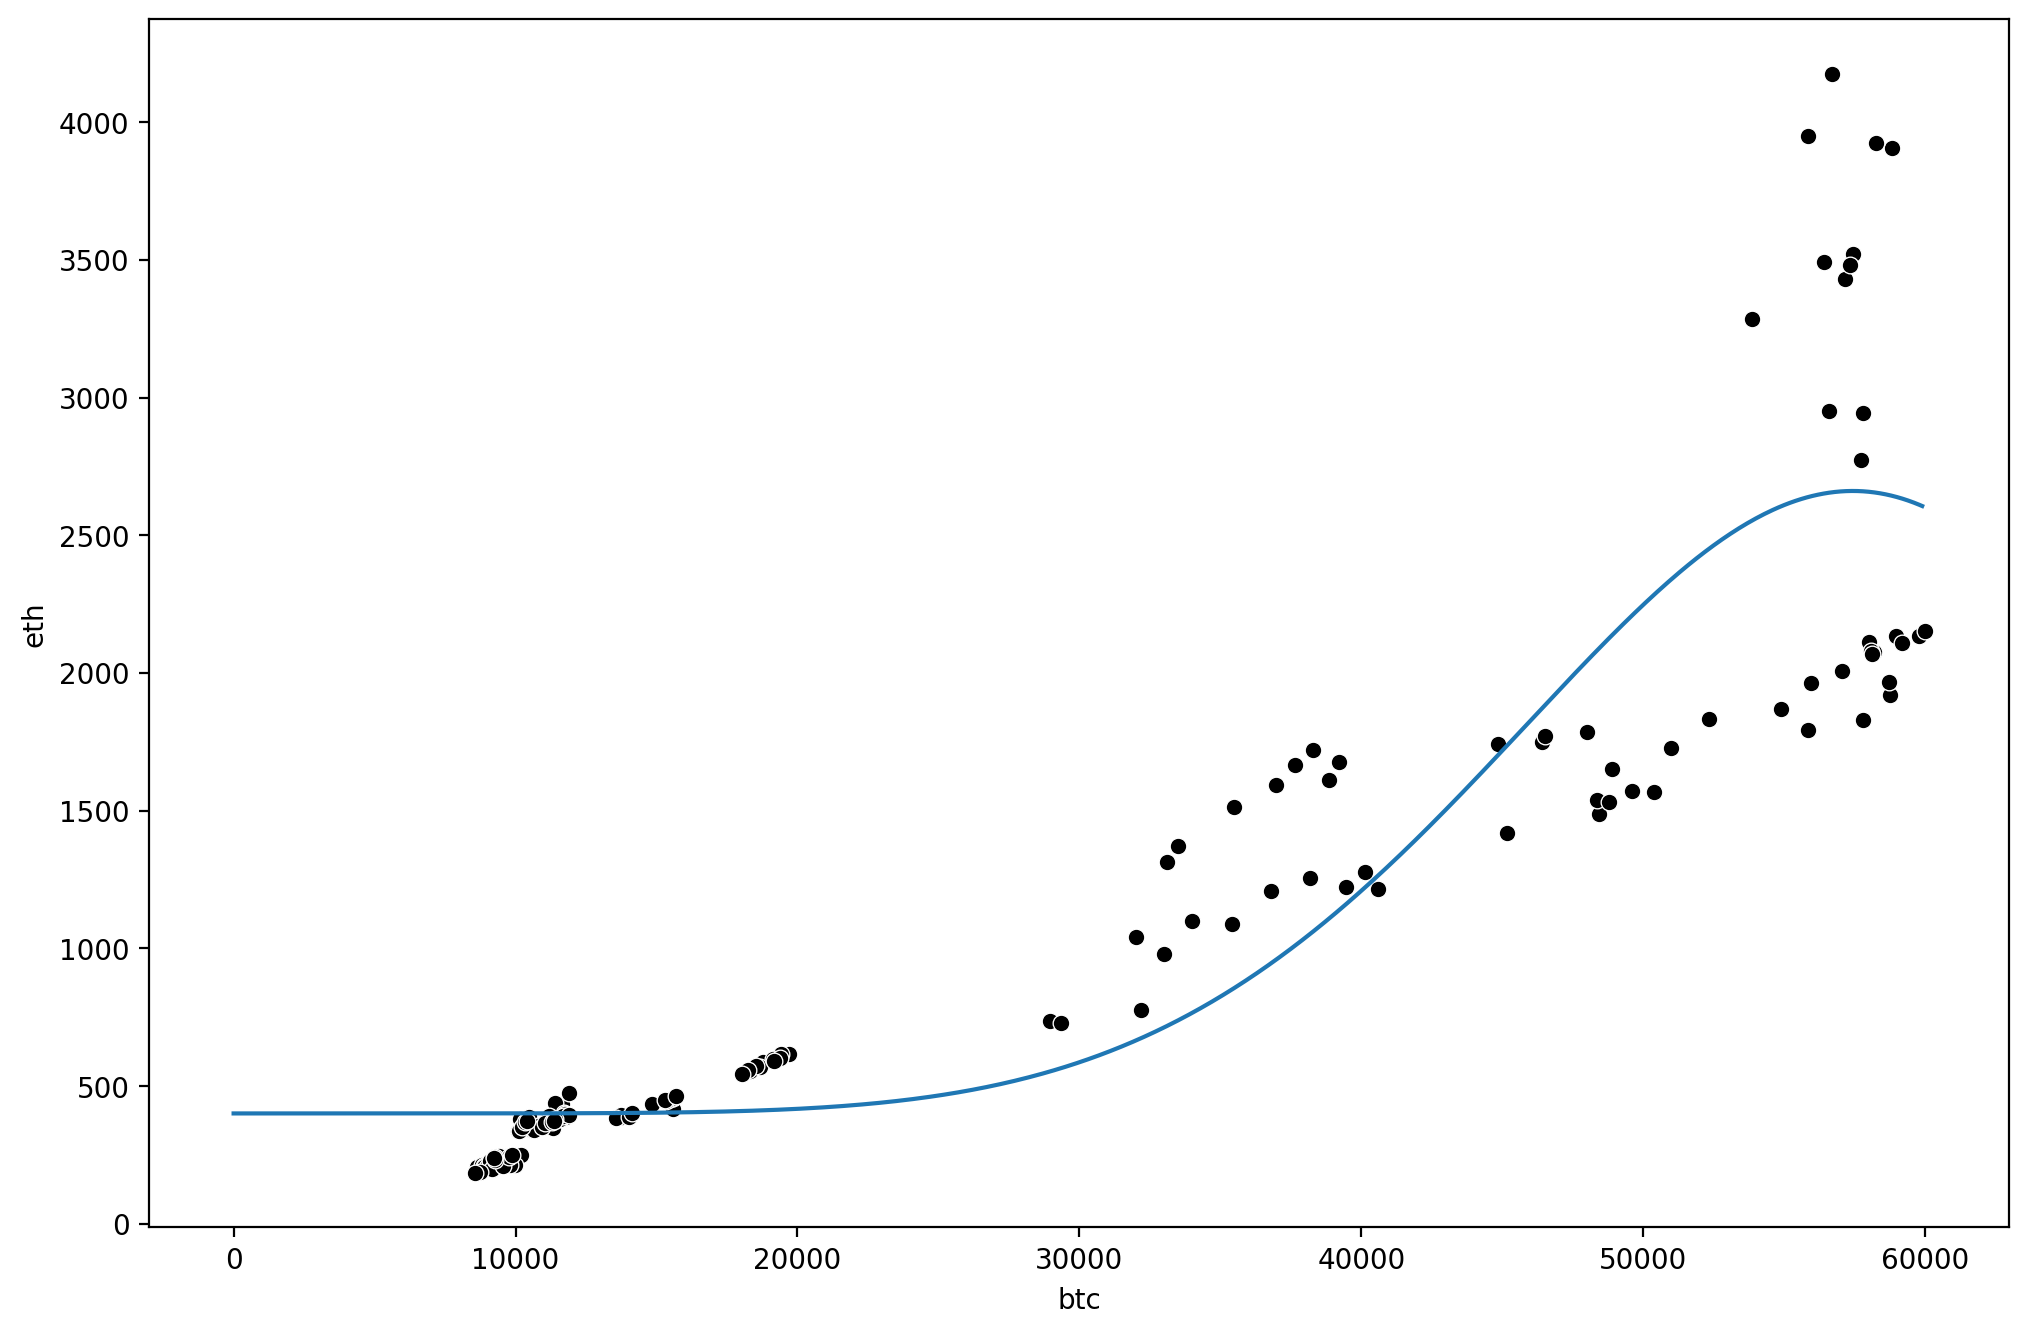

In [30]:
for i in range(3,10,2):
    pipe = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
    run_model = runn(pipe,X_train,X_test,y_train,y_test)


### KNN Regression

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
k_values = [1,2,3,5,10,25]

RMSE : 92.94972514303991
MAE : 92.94972514303991
RMSE : 248.36984915813213
MAE : 248.36984915813213
RMSE : 315.01967314301123
MAE : 315.01967314301123
RMSE : 340.30285744367967
MAE : 340.30285744367967
RMSE : 348.43271349405956
MAE : 348.43271349405956
RMSE : 308.17197442657465
MAE : 308.17197442657465


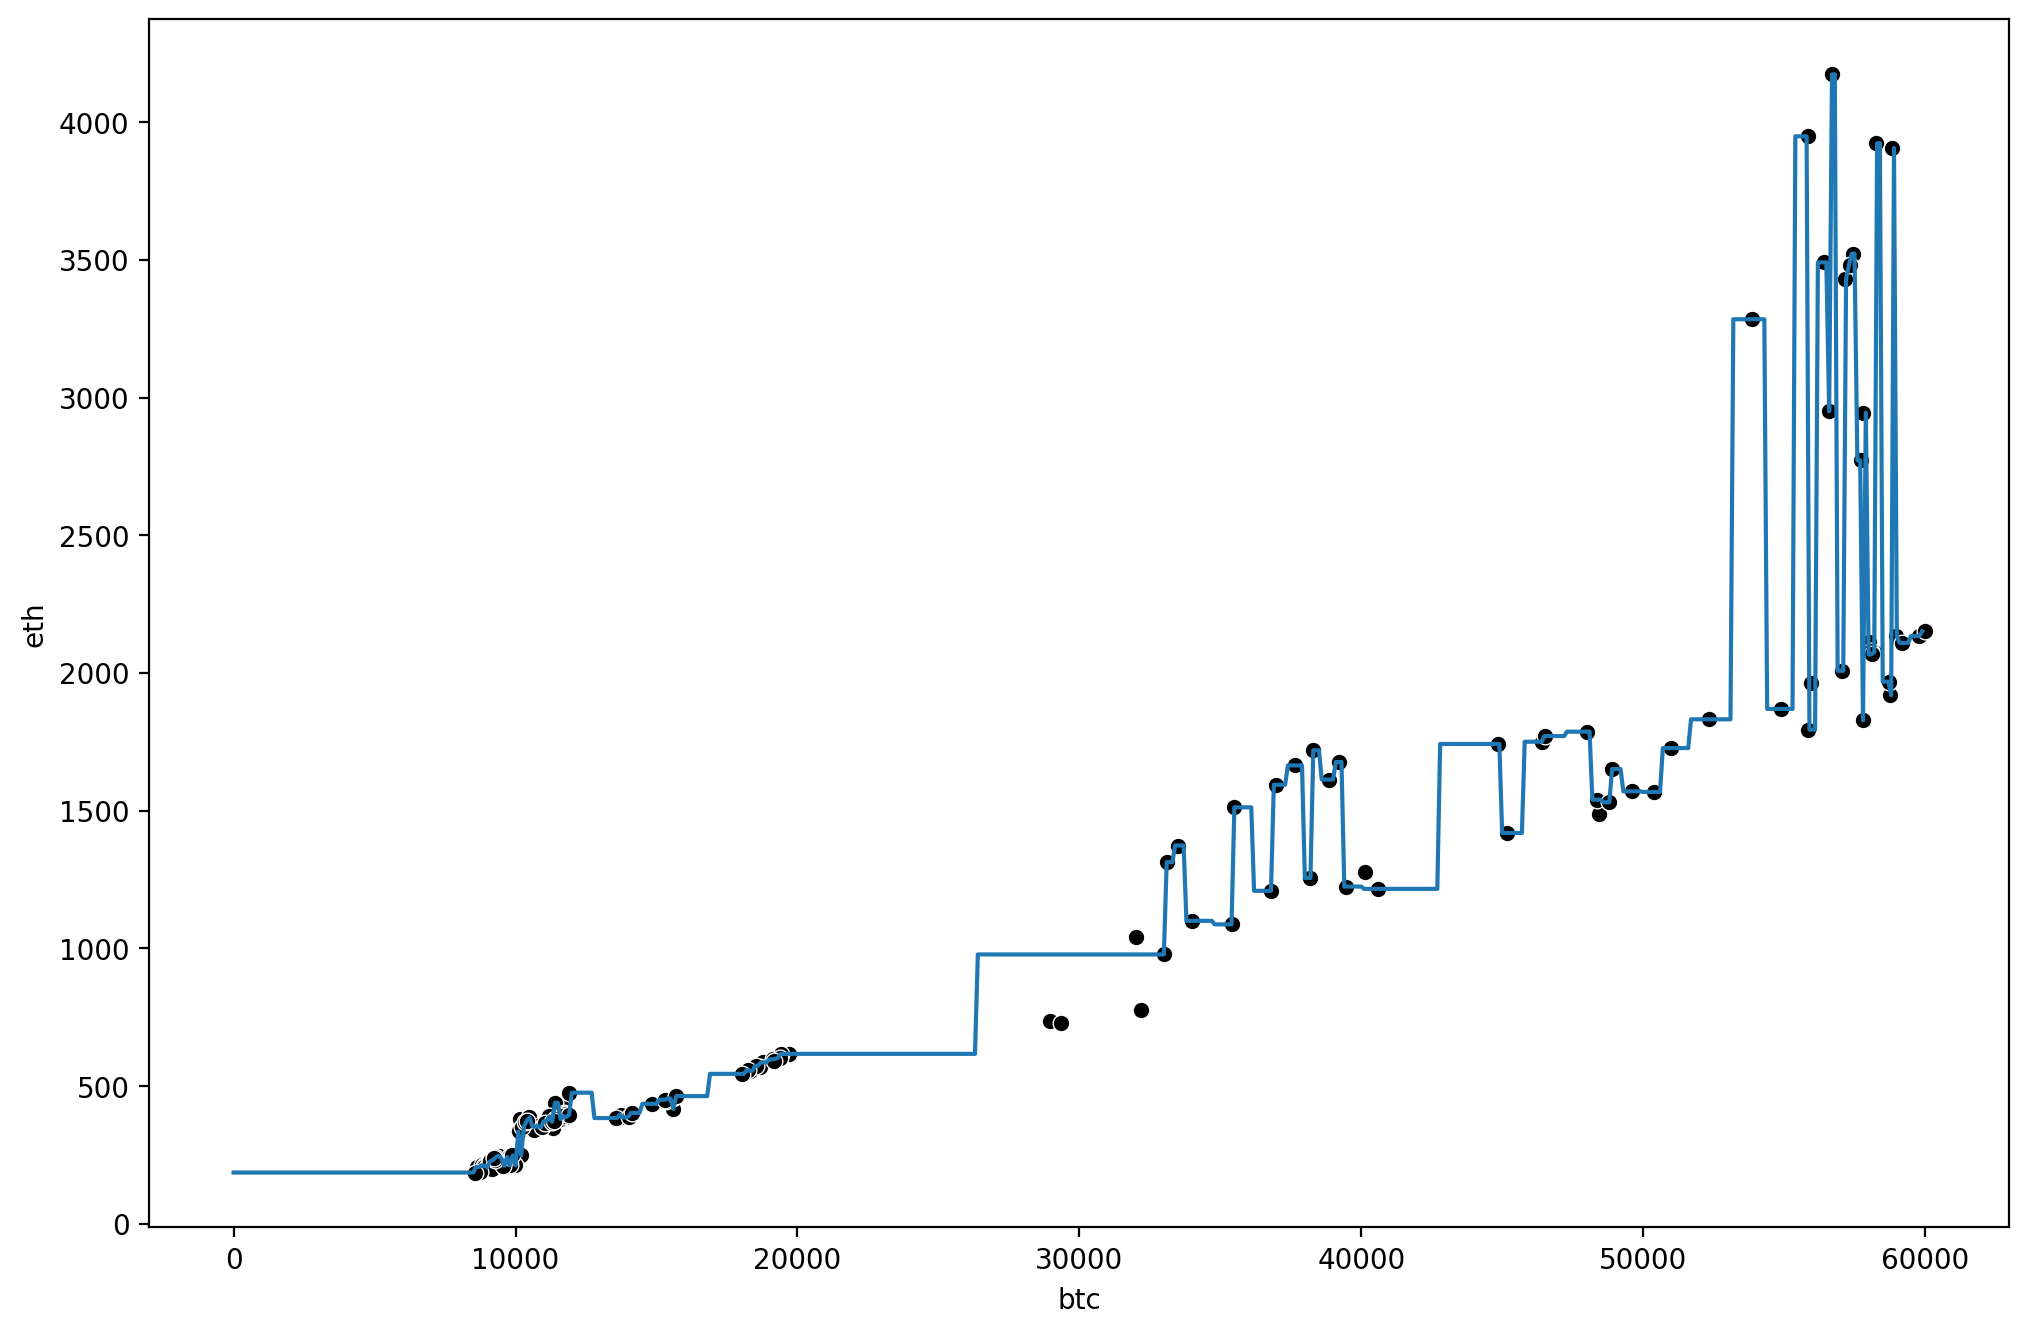

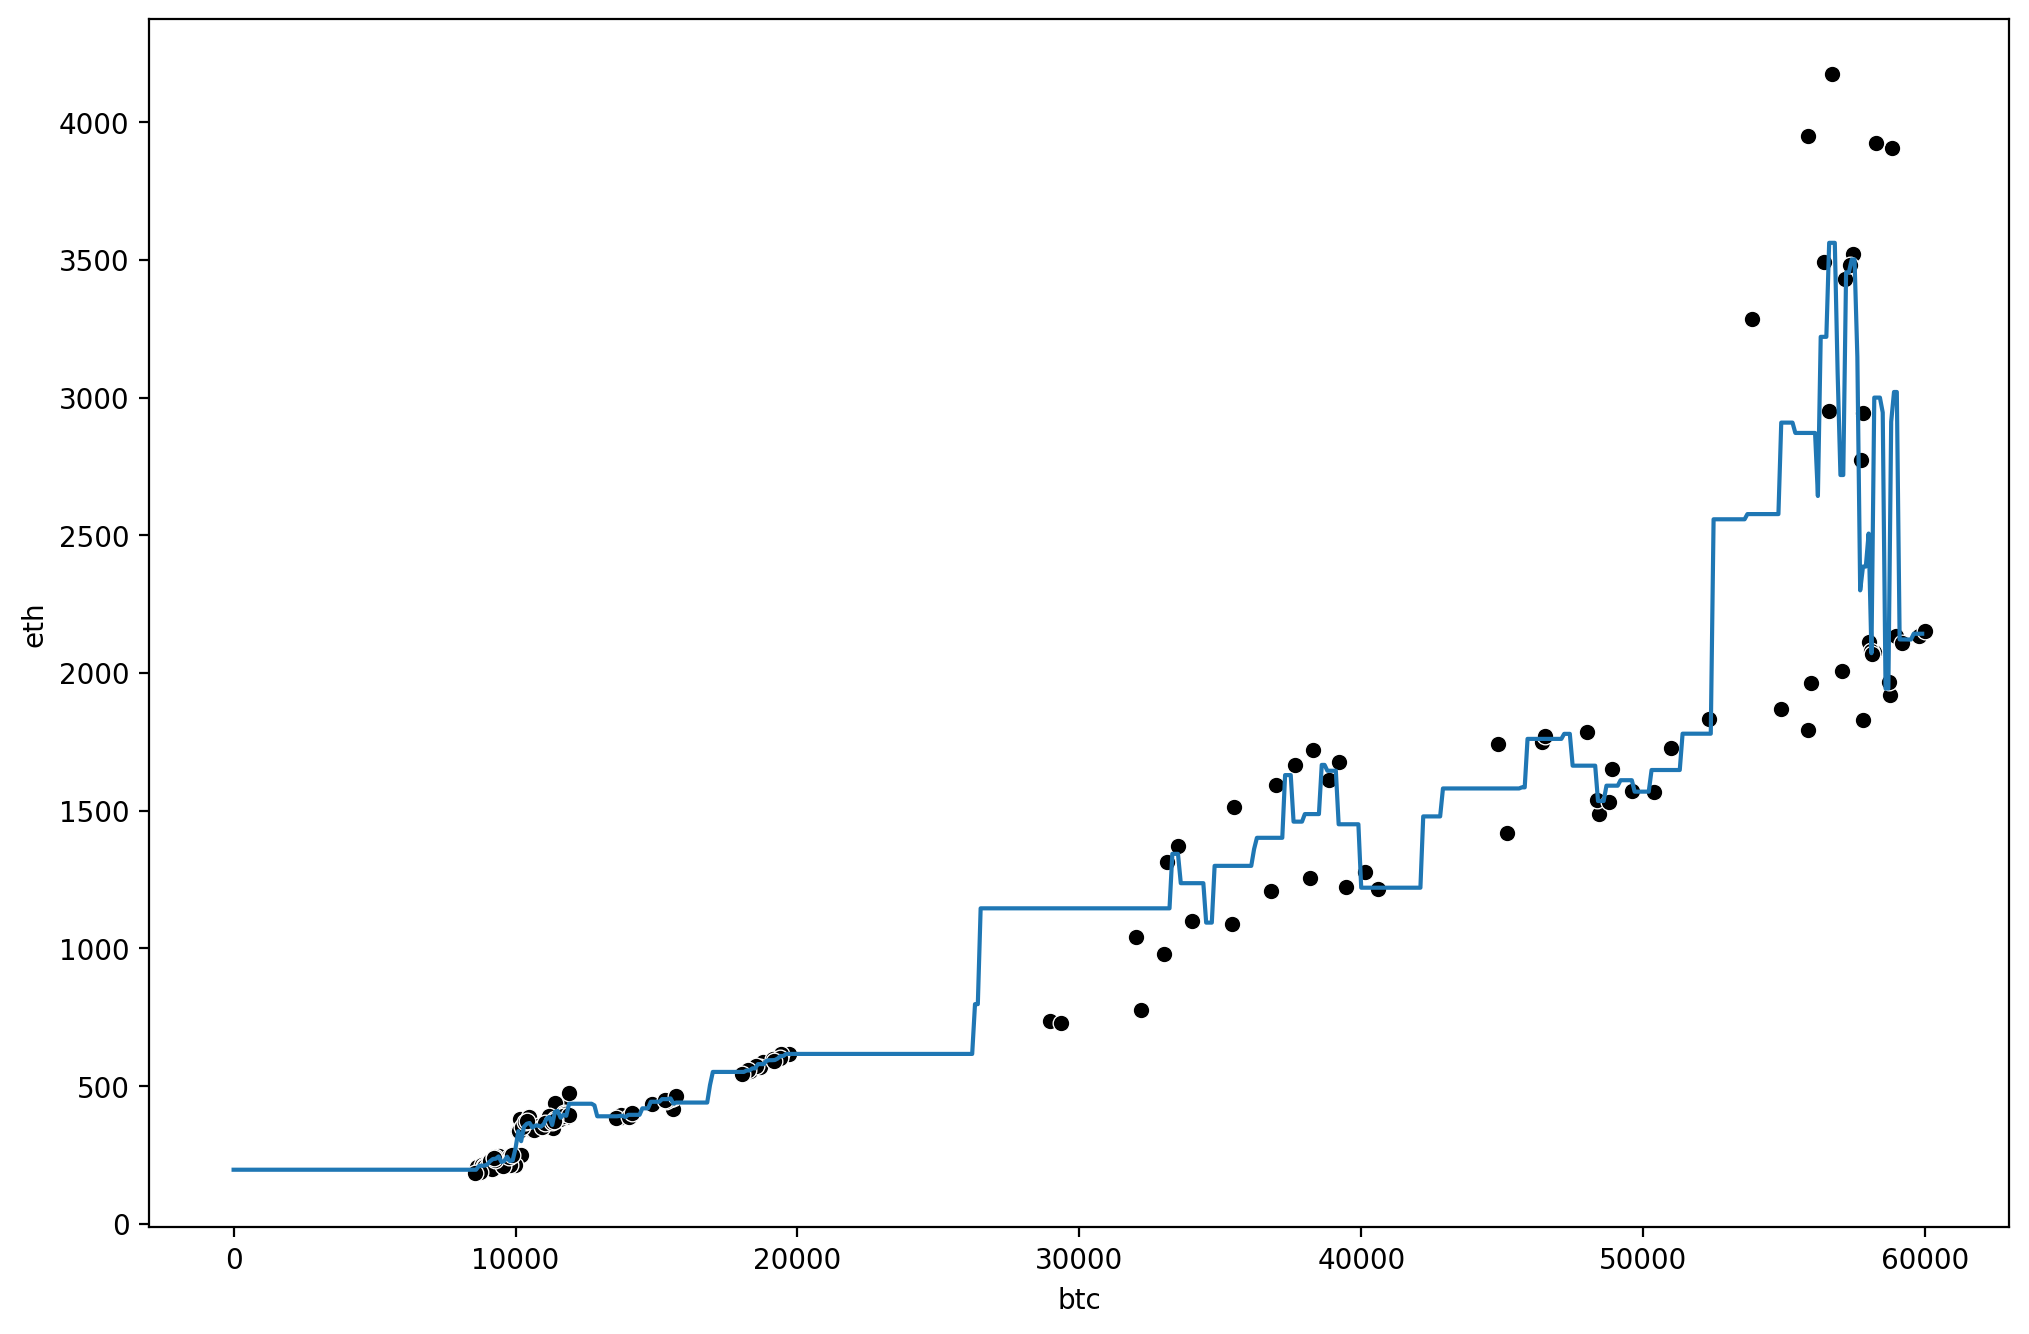

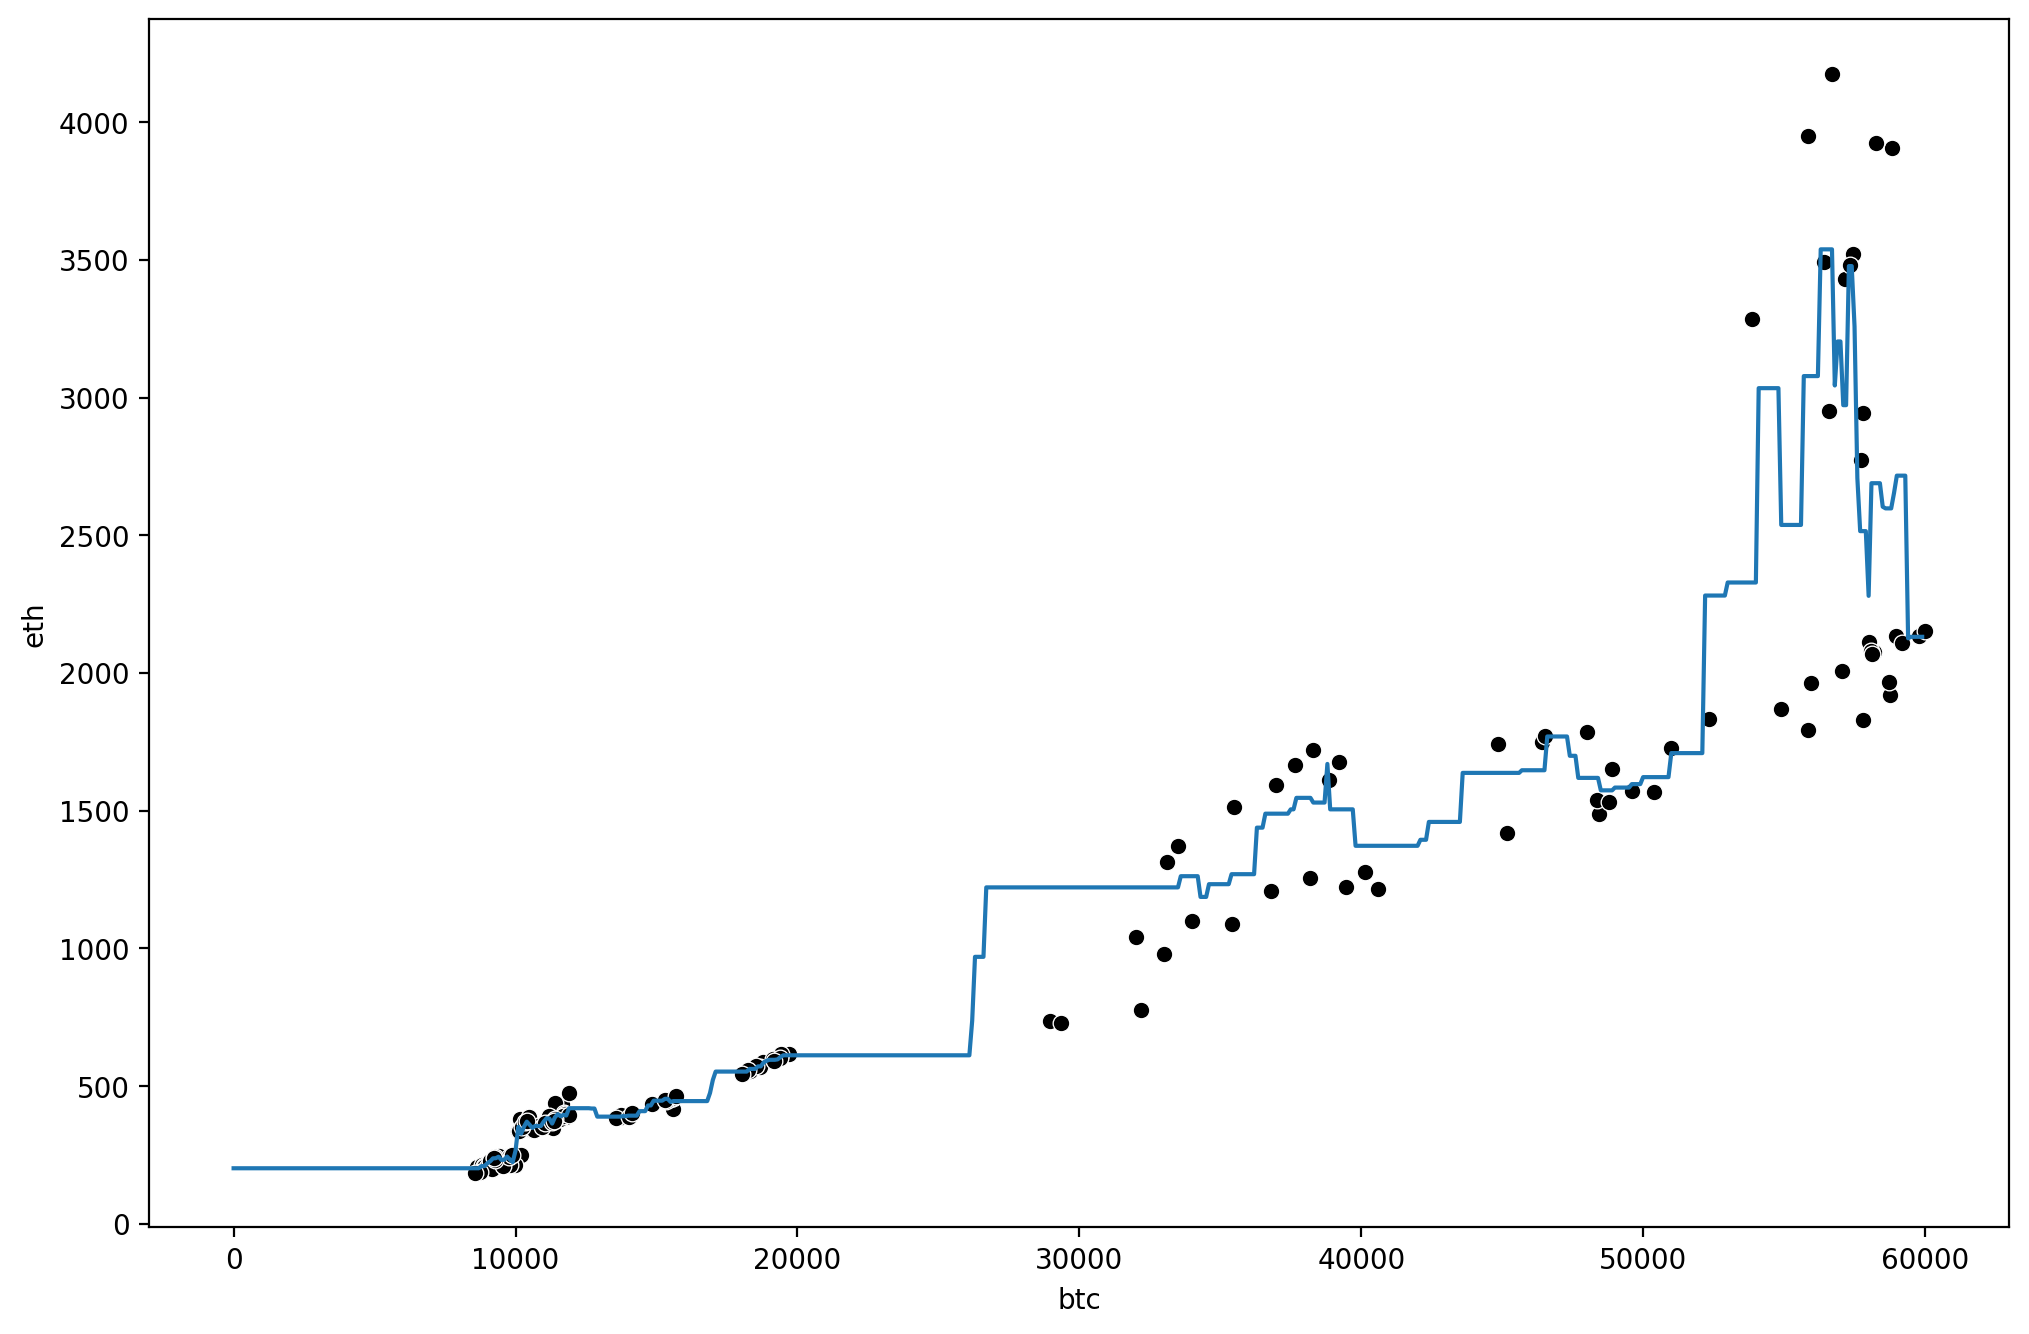

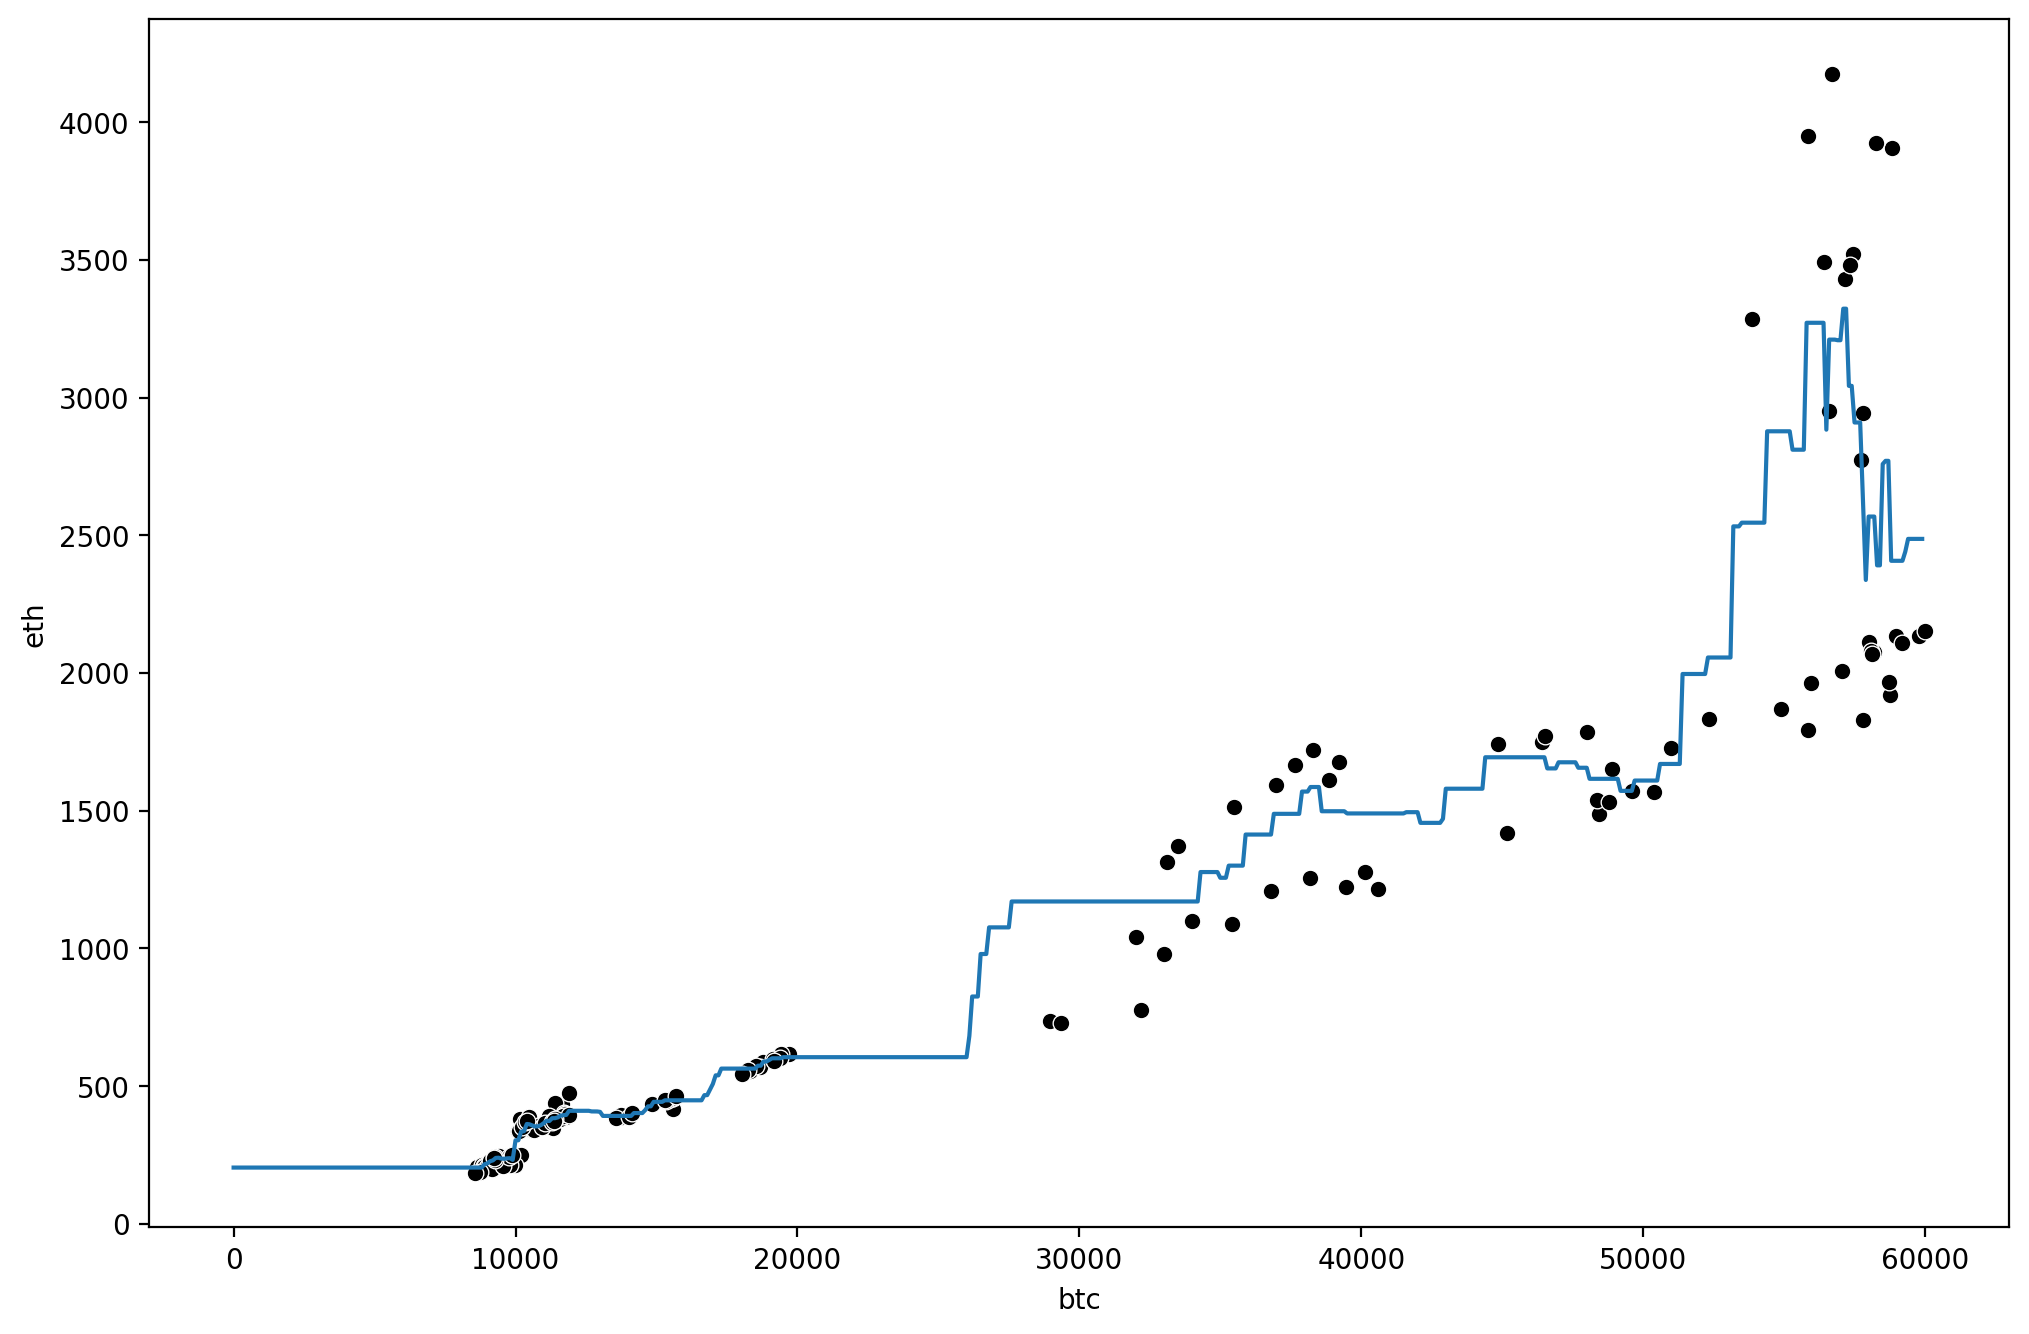

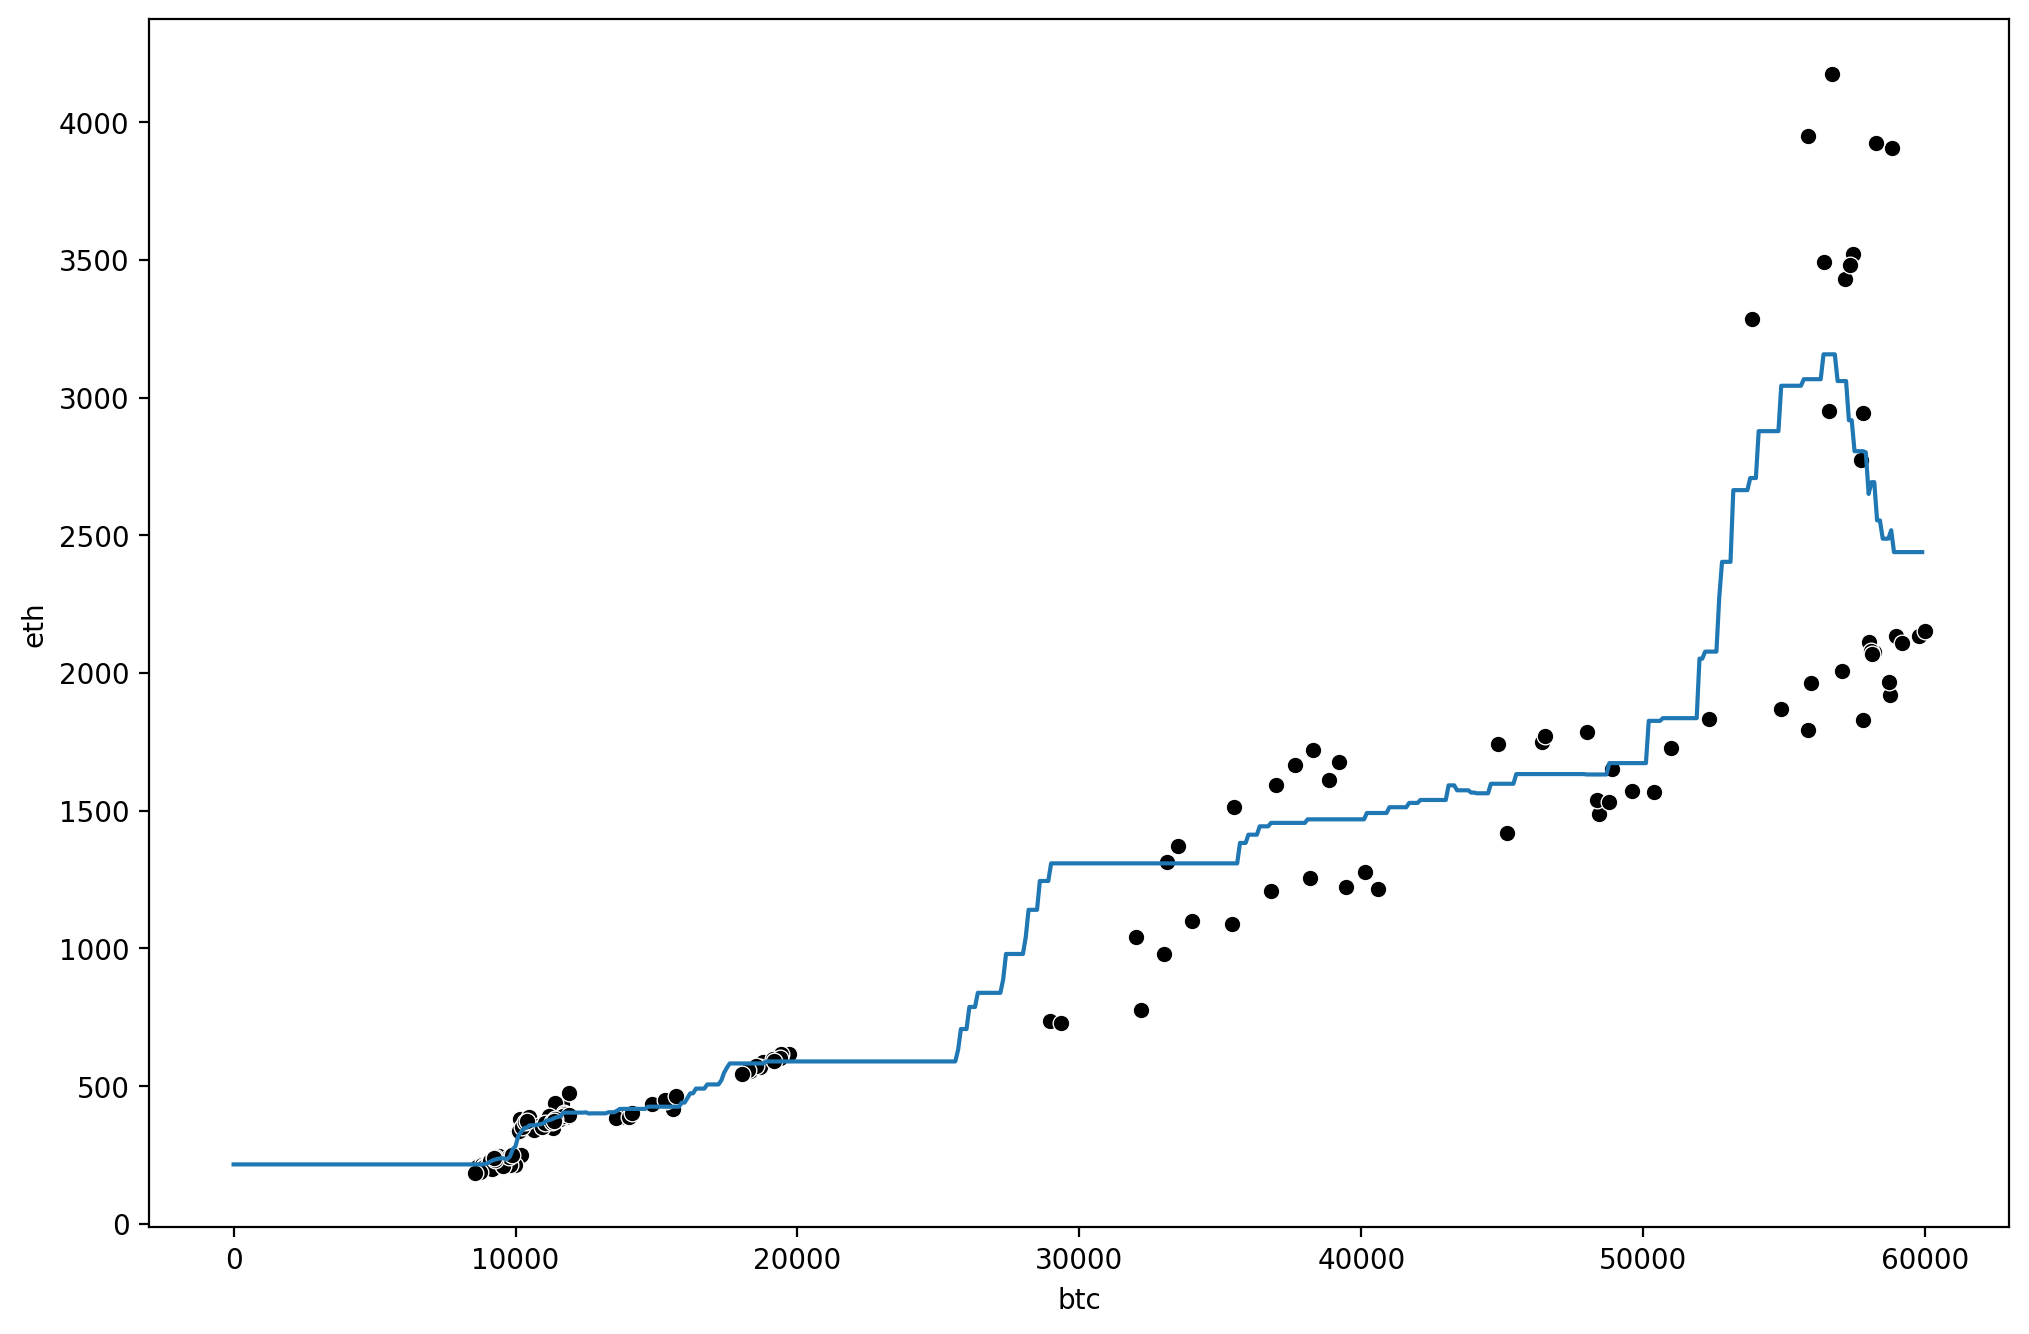

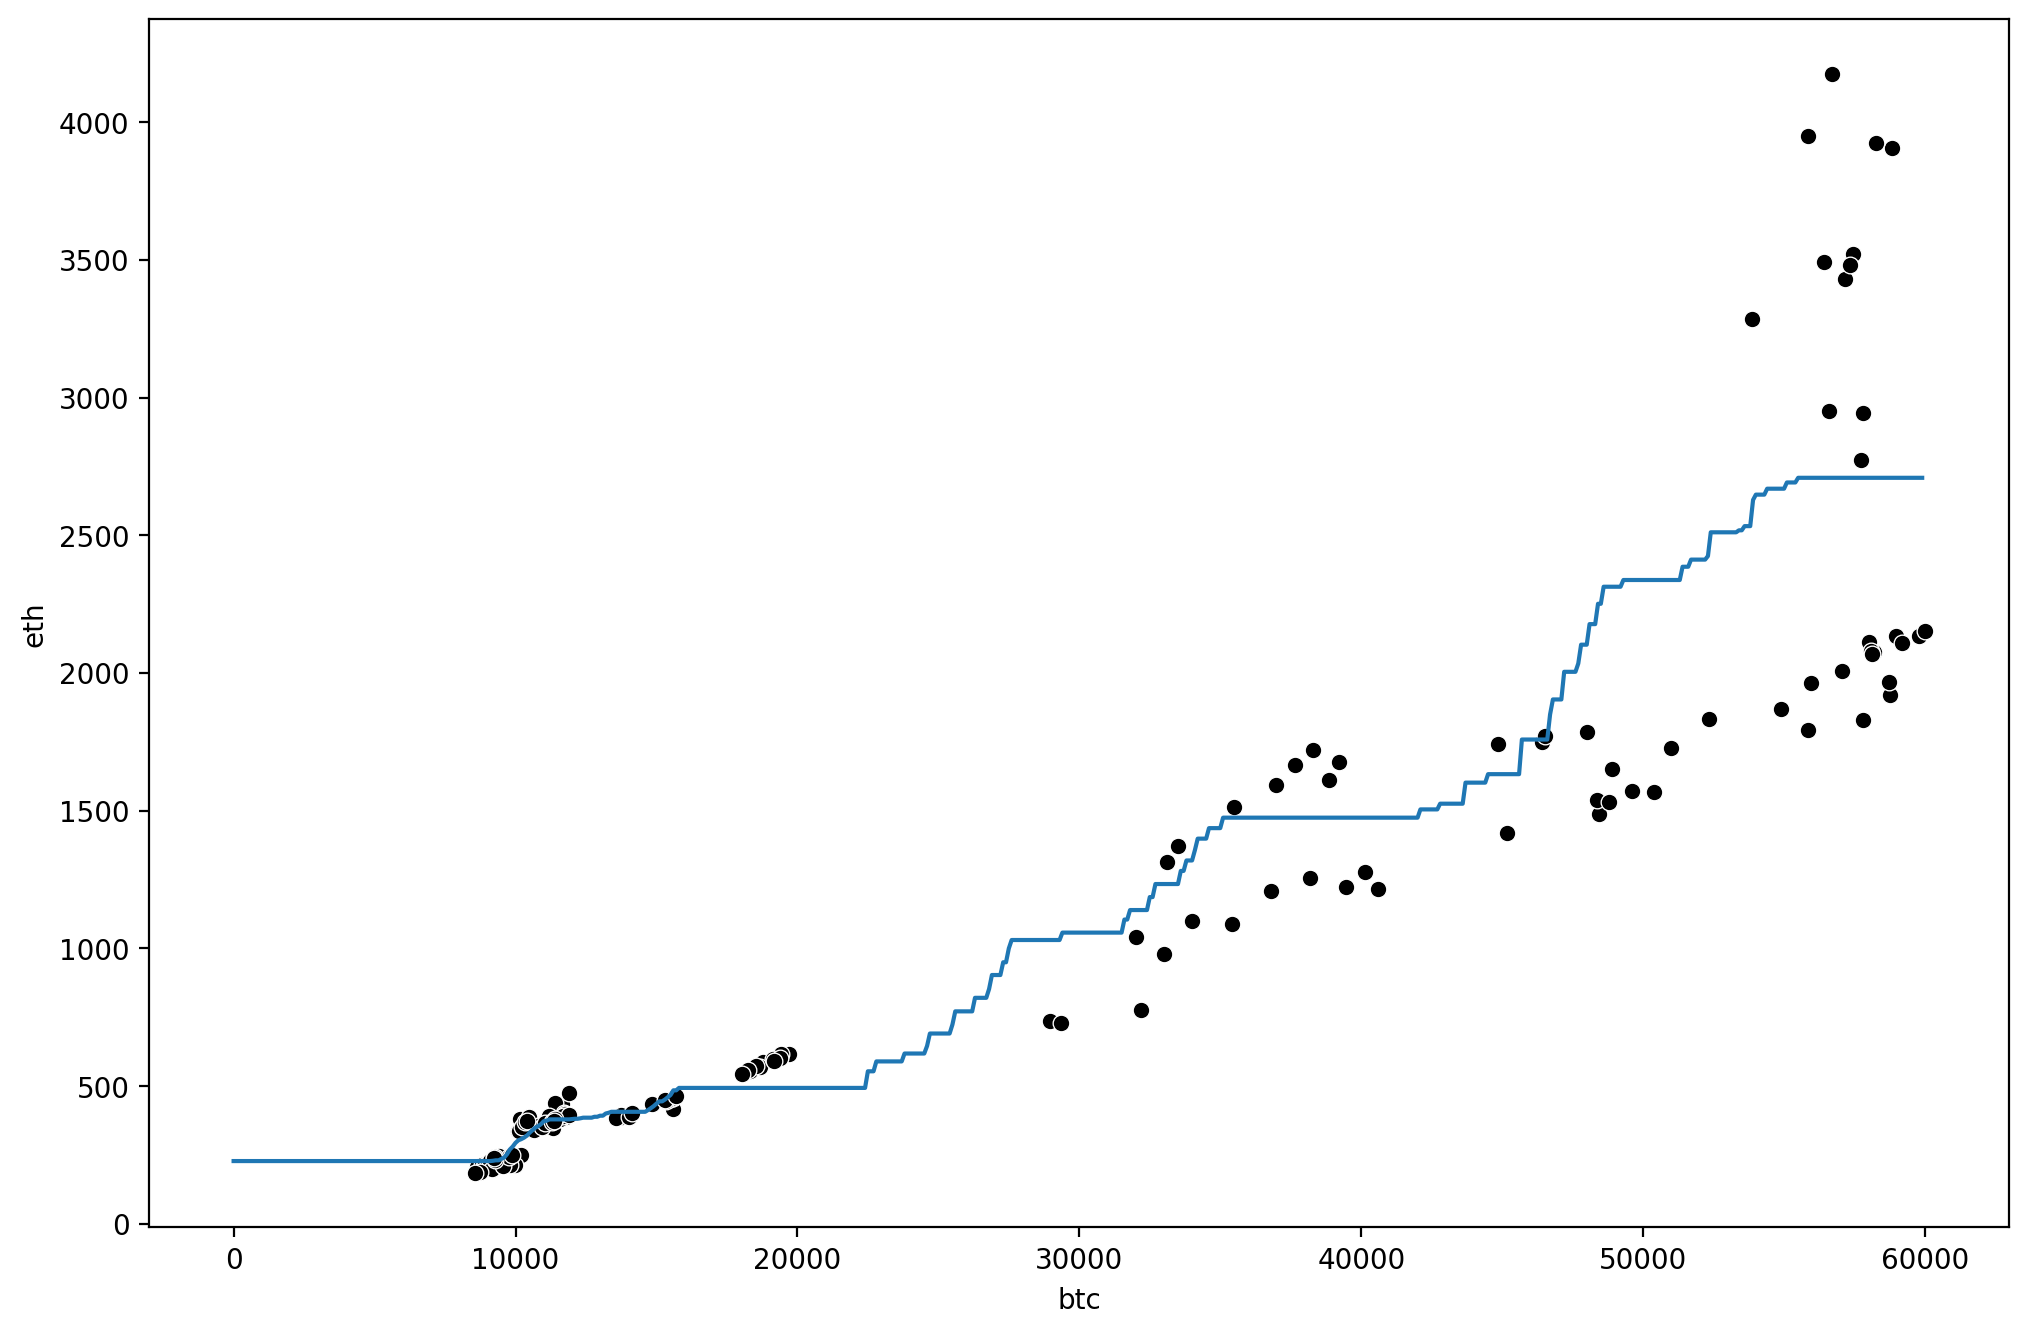

In [33]:
for i in k_values:
    model = KNeighborsRegressor(n_neighbors = i)
    runn(model,X_train,X_test,y_train,y_test)

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
model = DecisionTreeRegressor()

RMSE : 92.94972514303991
MAE : 92.94972514303991


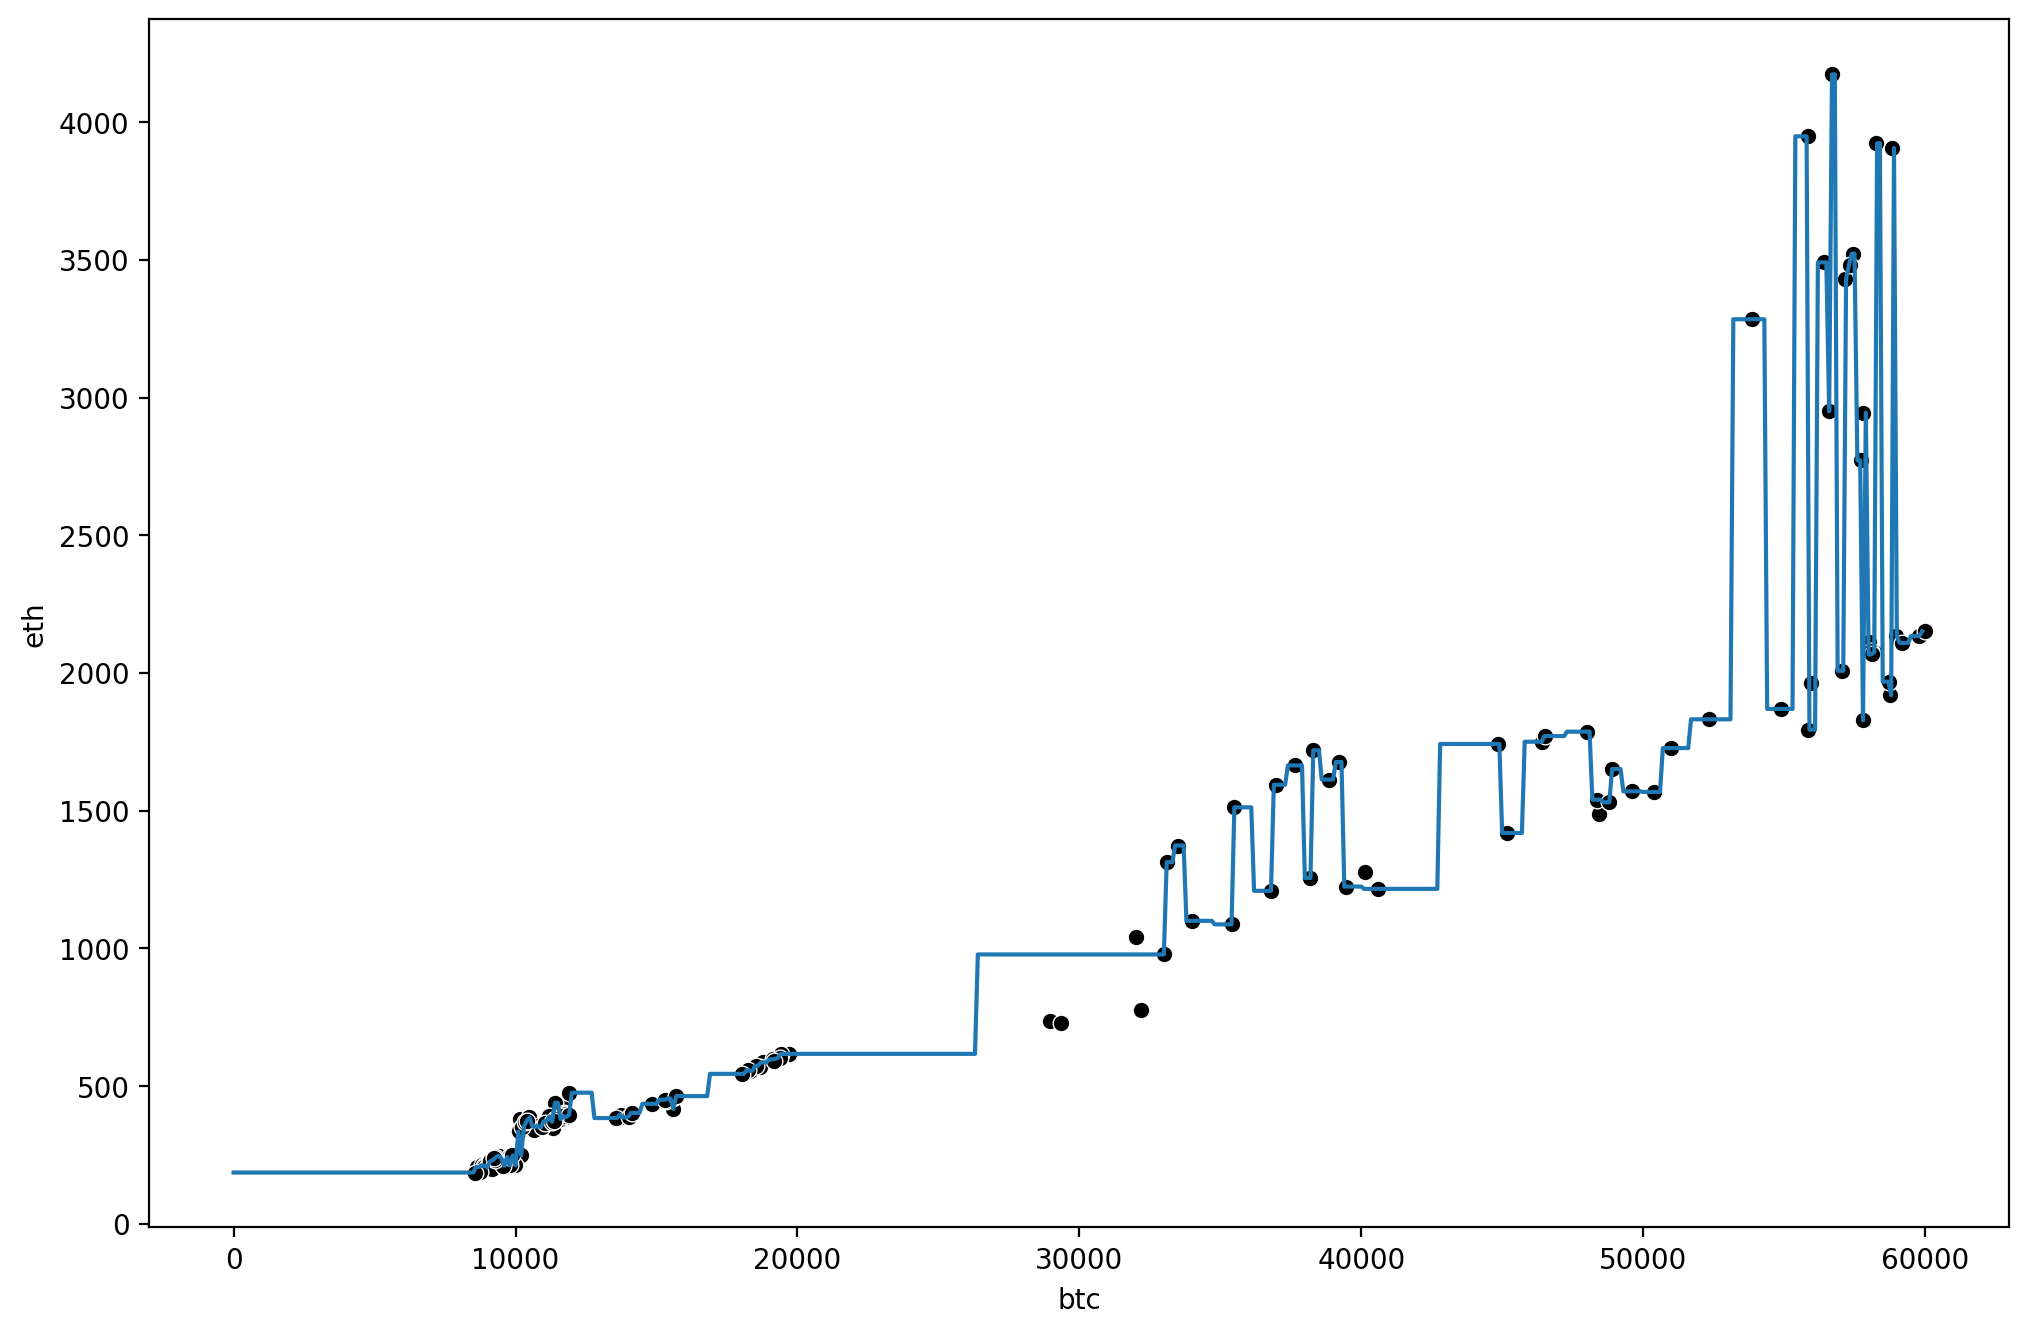

In [36]:
runn(model,X_train,X_test,y_train,y_test)

### Support Vector Regression (SVR)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#### GridSearchCV

Hyperparameter optimization is the process of finding the most appropriate combination of hyperparameters according to the success metric determined for a machine learning algorithm.

With hyperparameter optimization, the model complexity can be balanced and the balance of overfitting and underfitting can be achieved.

Considering that there are tens of hyperparameters and tens of values ​​that these hyperparameters can take for a machine learning algorithm, it is clear how difficult it would be to try all combinations one by one and choose the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearcCV and RandomizedSearchCV are such methods.

A separate model is created with all combinations for the hyperparameters and their values ​​that are desired to be tested in the model, and the most successful hyperparameter set is determined according to the specified metric.
(+) Guarantees to identify the best performing hyperparameter set as all combinations have been tried. It works very well on small datasets and when only a few hyperparameters are wanted to be tested.
(-) When working with a large data set or when the number and value of hyperparameters to be tried are increased, the number of combinations will increase exponentially.

In [39]:
svr = SVR()
param_grid = {"C" : [0.01,0.1,1,10,100,1000],
             "gamma" : ["auto","scale"]}

In [40]:
grid = GridSearchCV(svr,param_grid)

RMSE : 118.44666690128551
MAE : 118.44666690128551


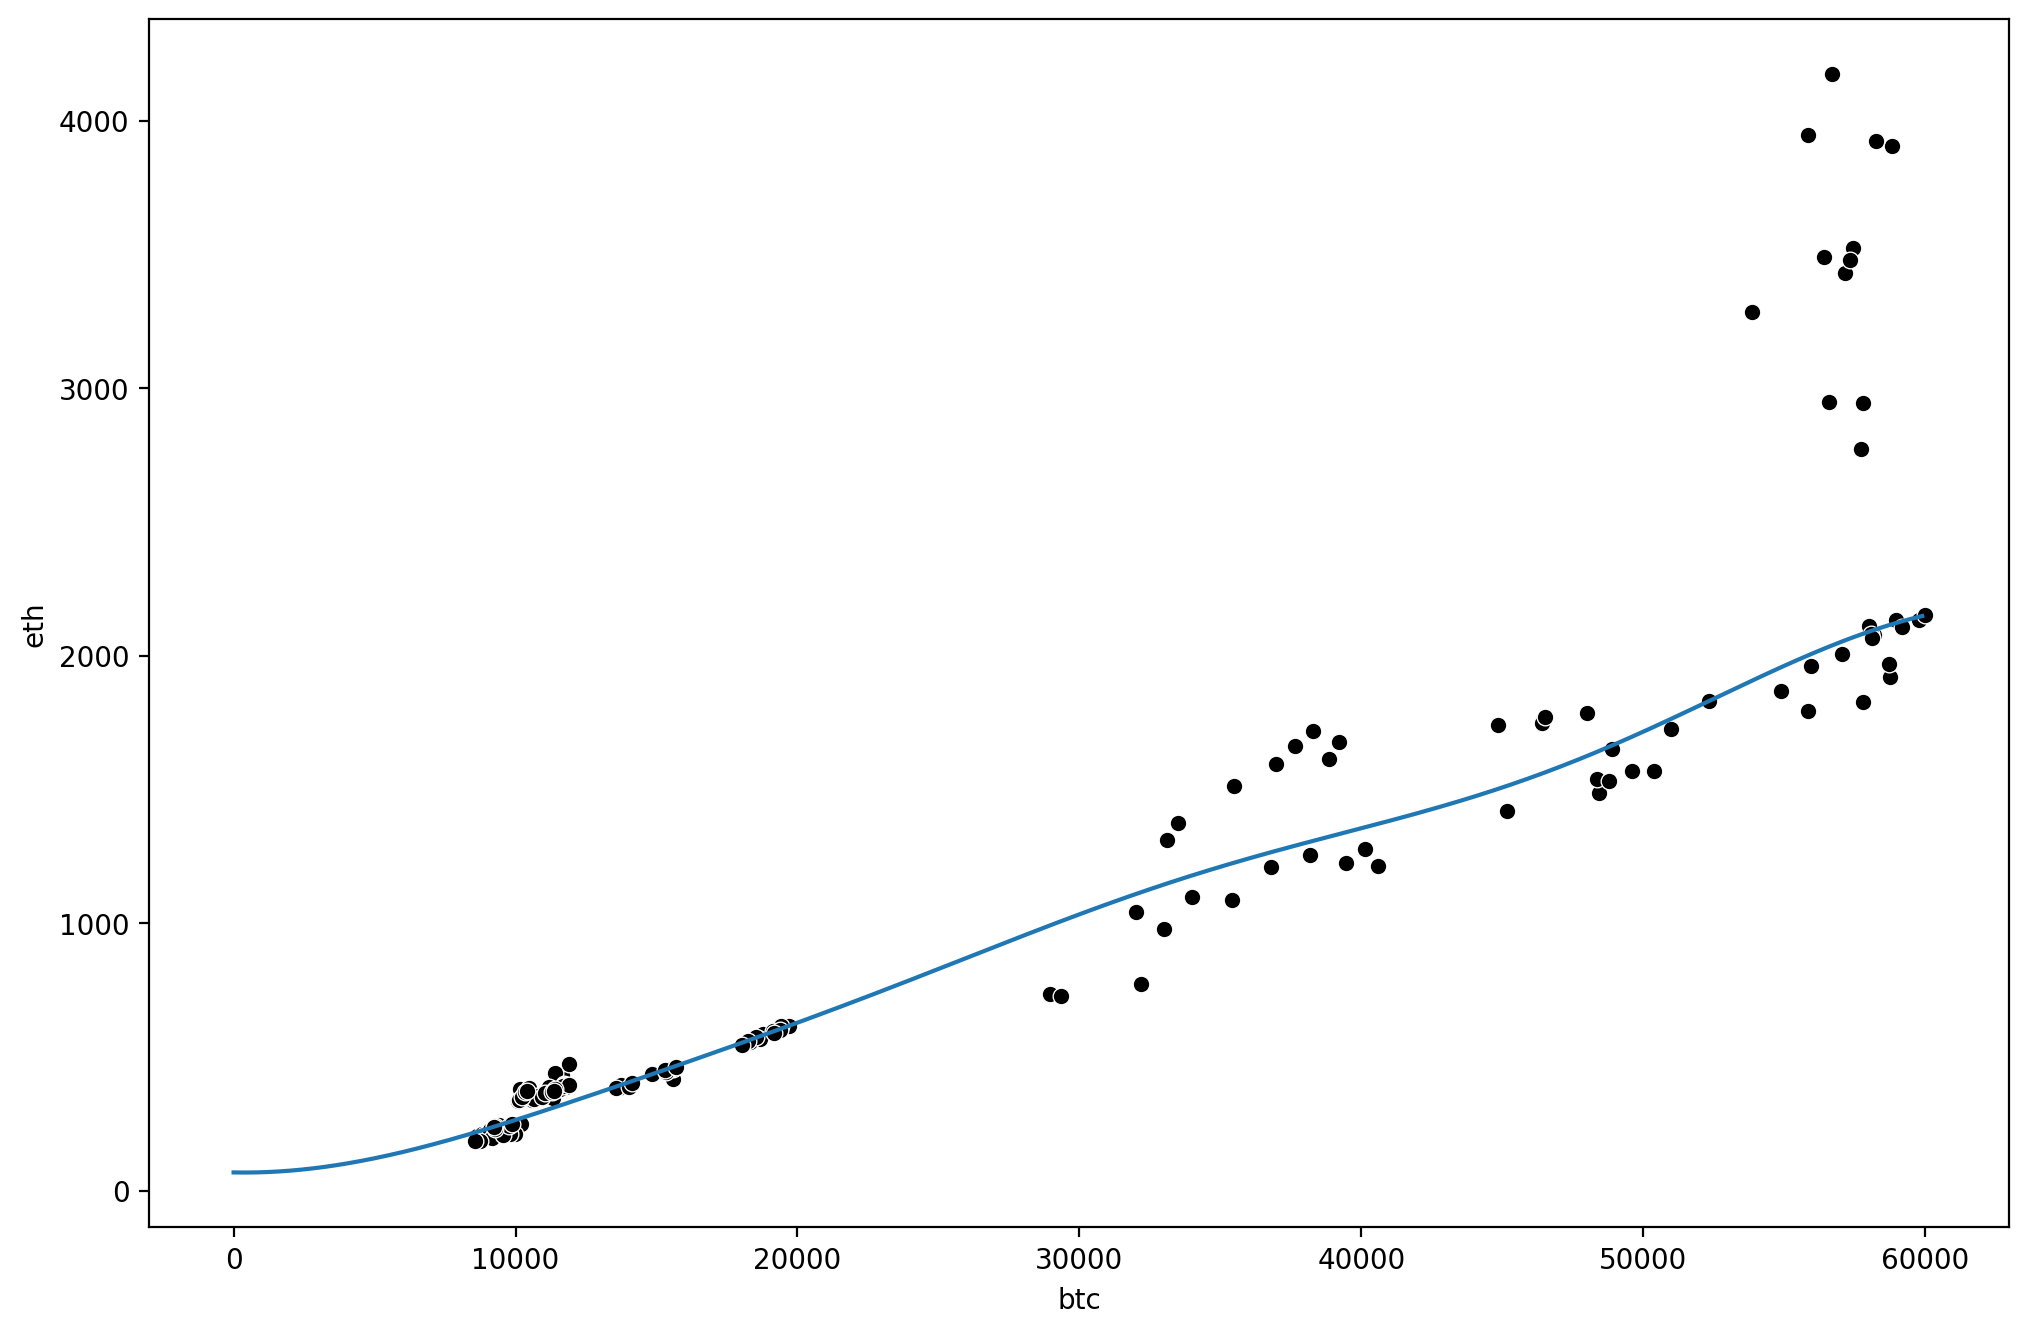

In [41]:
runn(grid,X_train,X_test,y_train,y_test)

In [42]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

We use the best parameters in the model

In [43]:
model = SVR(C = 1000, gamma = "scale")

RMSE : 118.44666690128551
MAE : 118.44666690128551


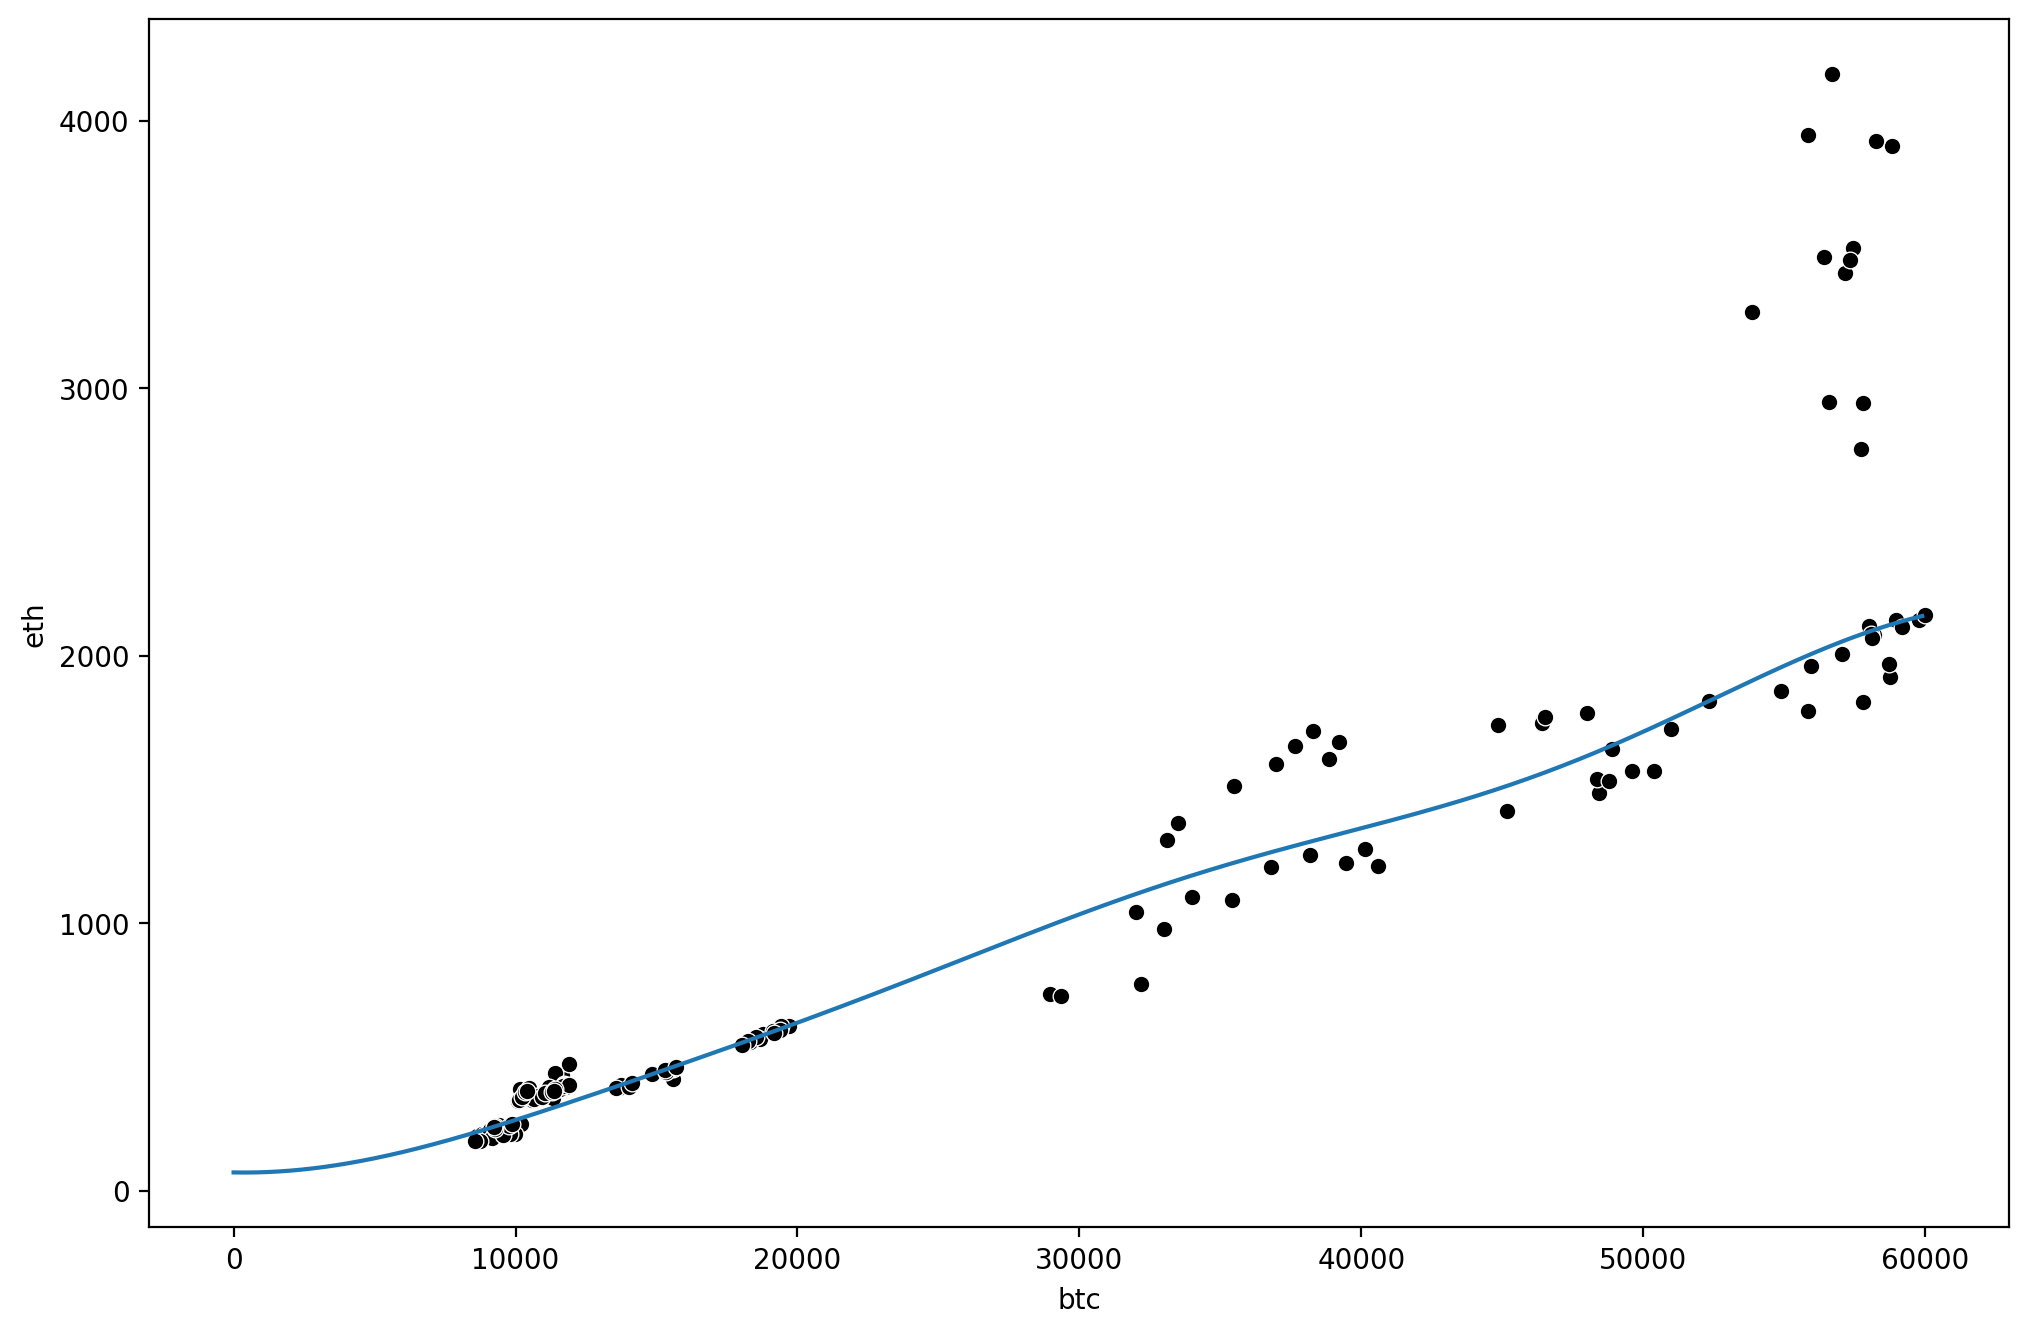

In [44]:
runn(model,X_train,X_test,y_train,y_test)

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 132.3287252174171
MAE : 132.3287252174171


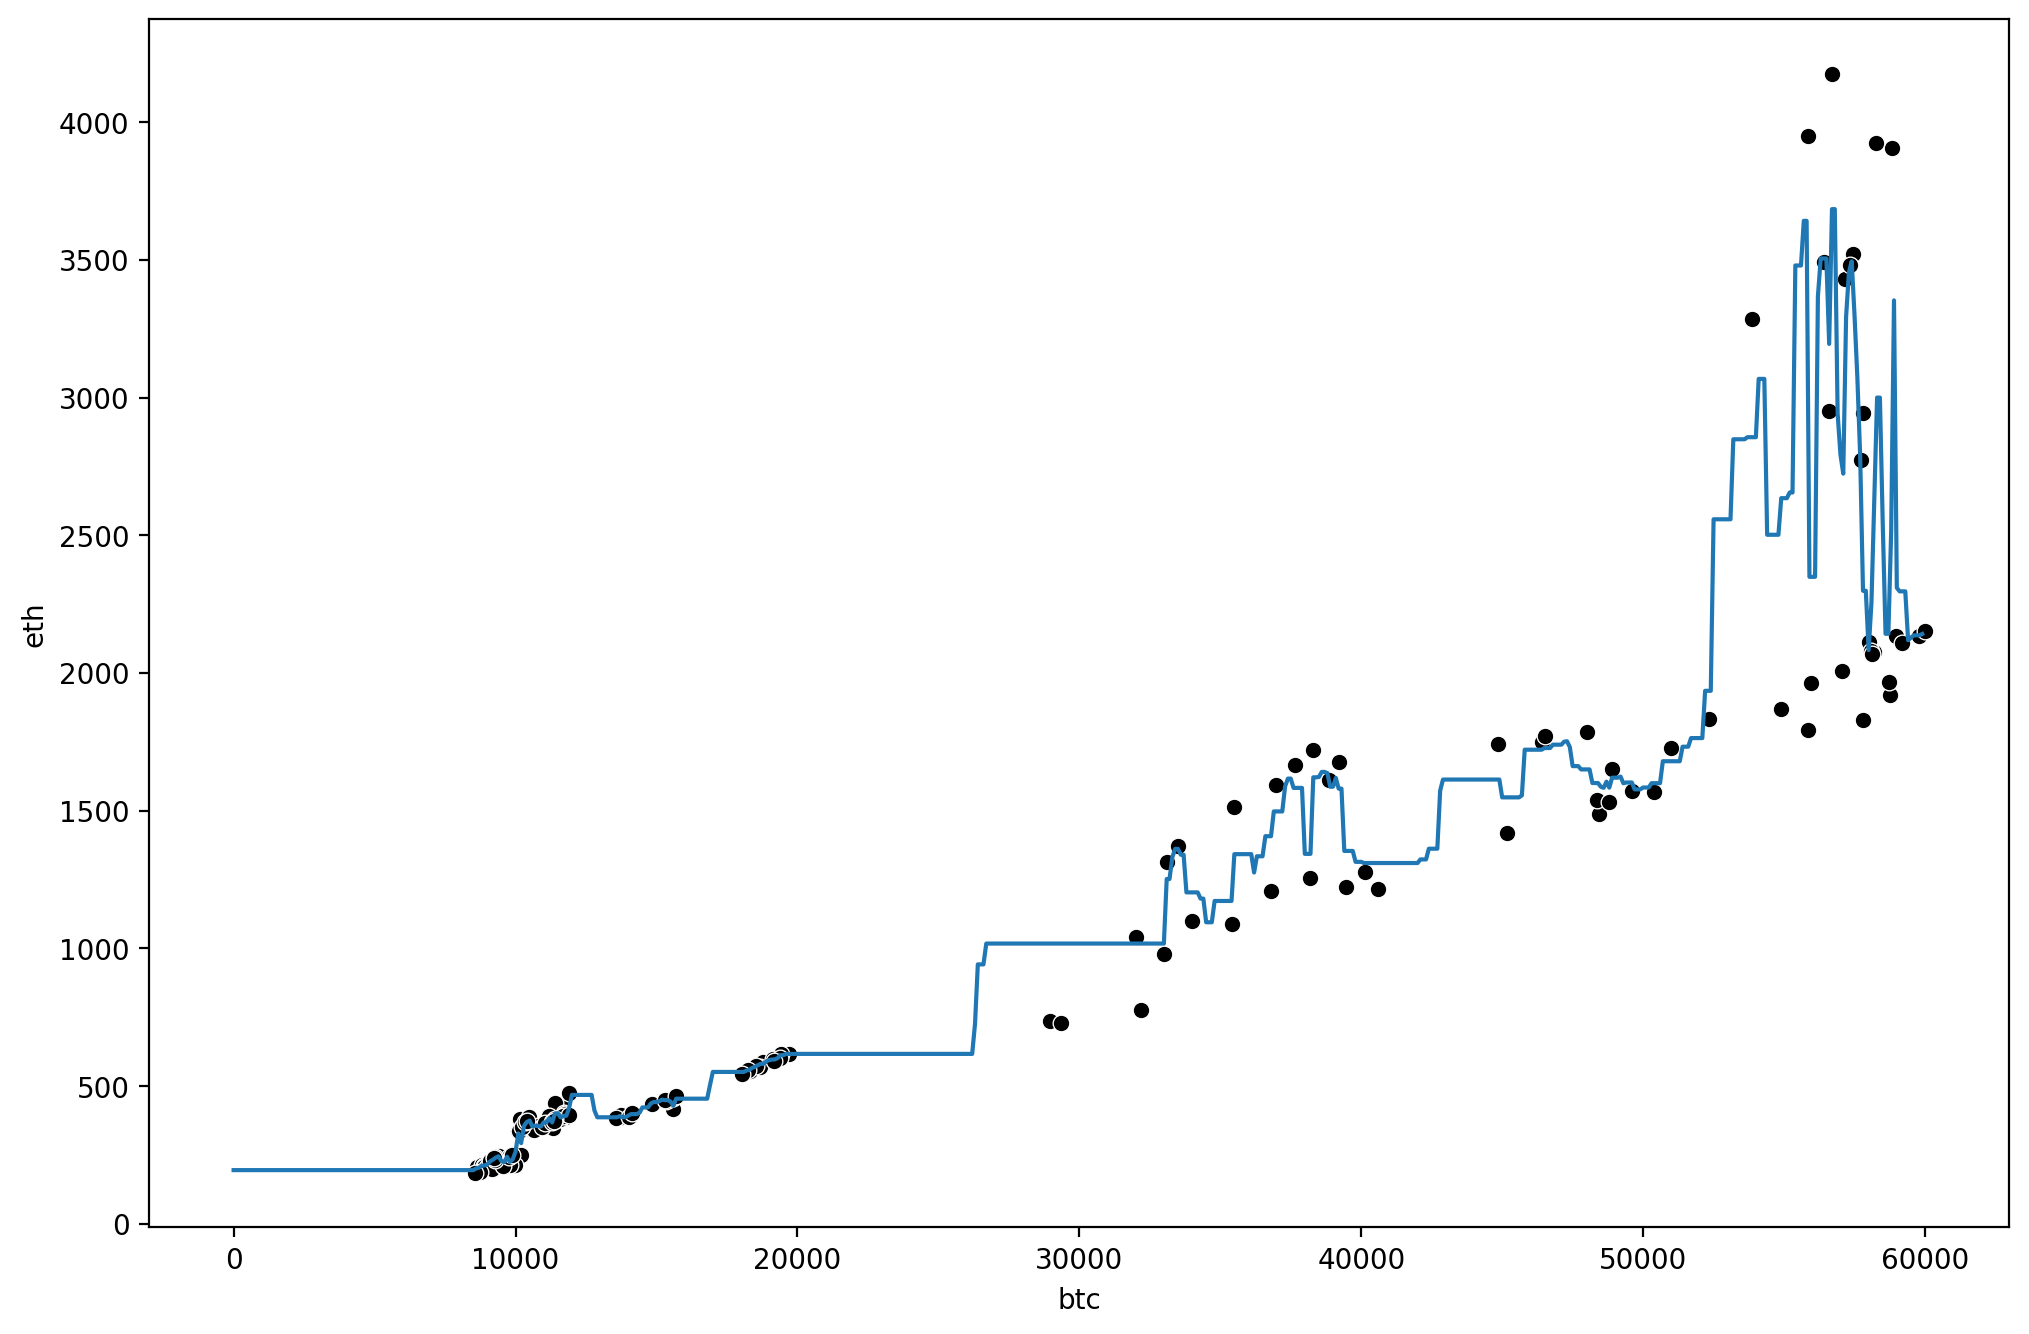

In [46]:
rf = RandomForestRegressor(n_estimators = 10)
runn(rf,X_train,X_test,y_train,y_test)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

### GradientBoosting

RMSE : 94.78549433175827
MAE : 94.78549433175827


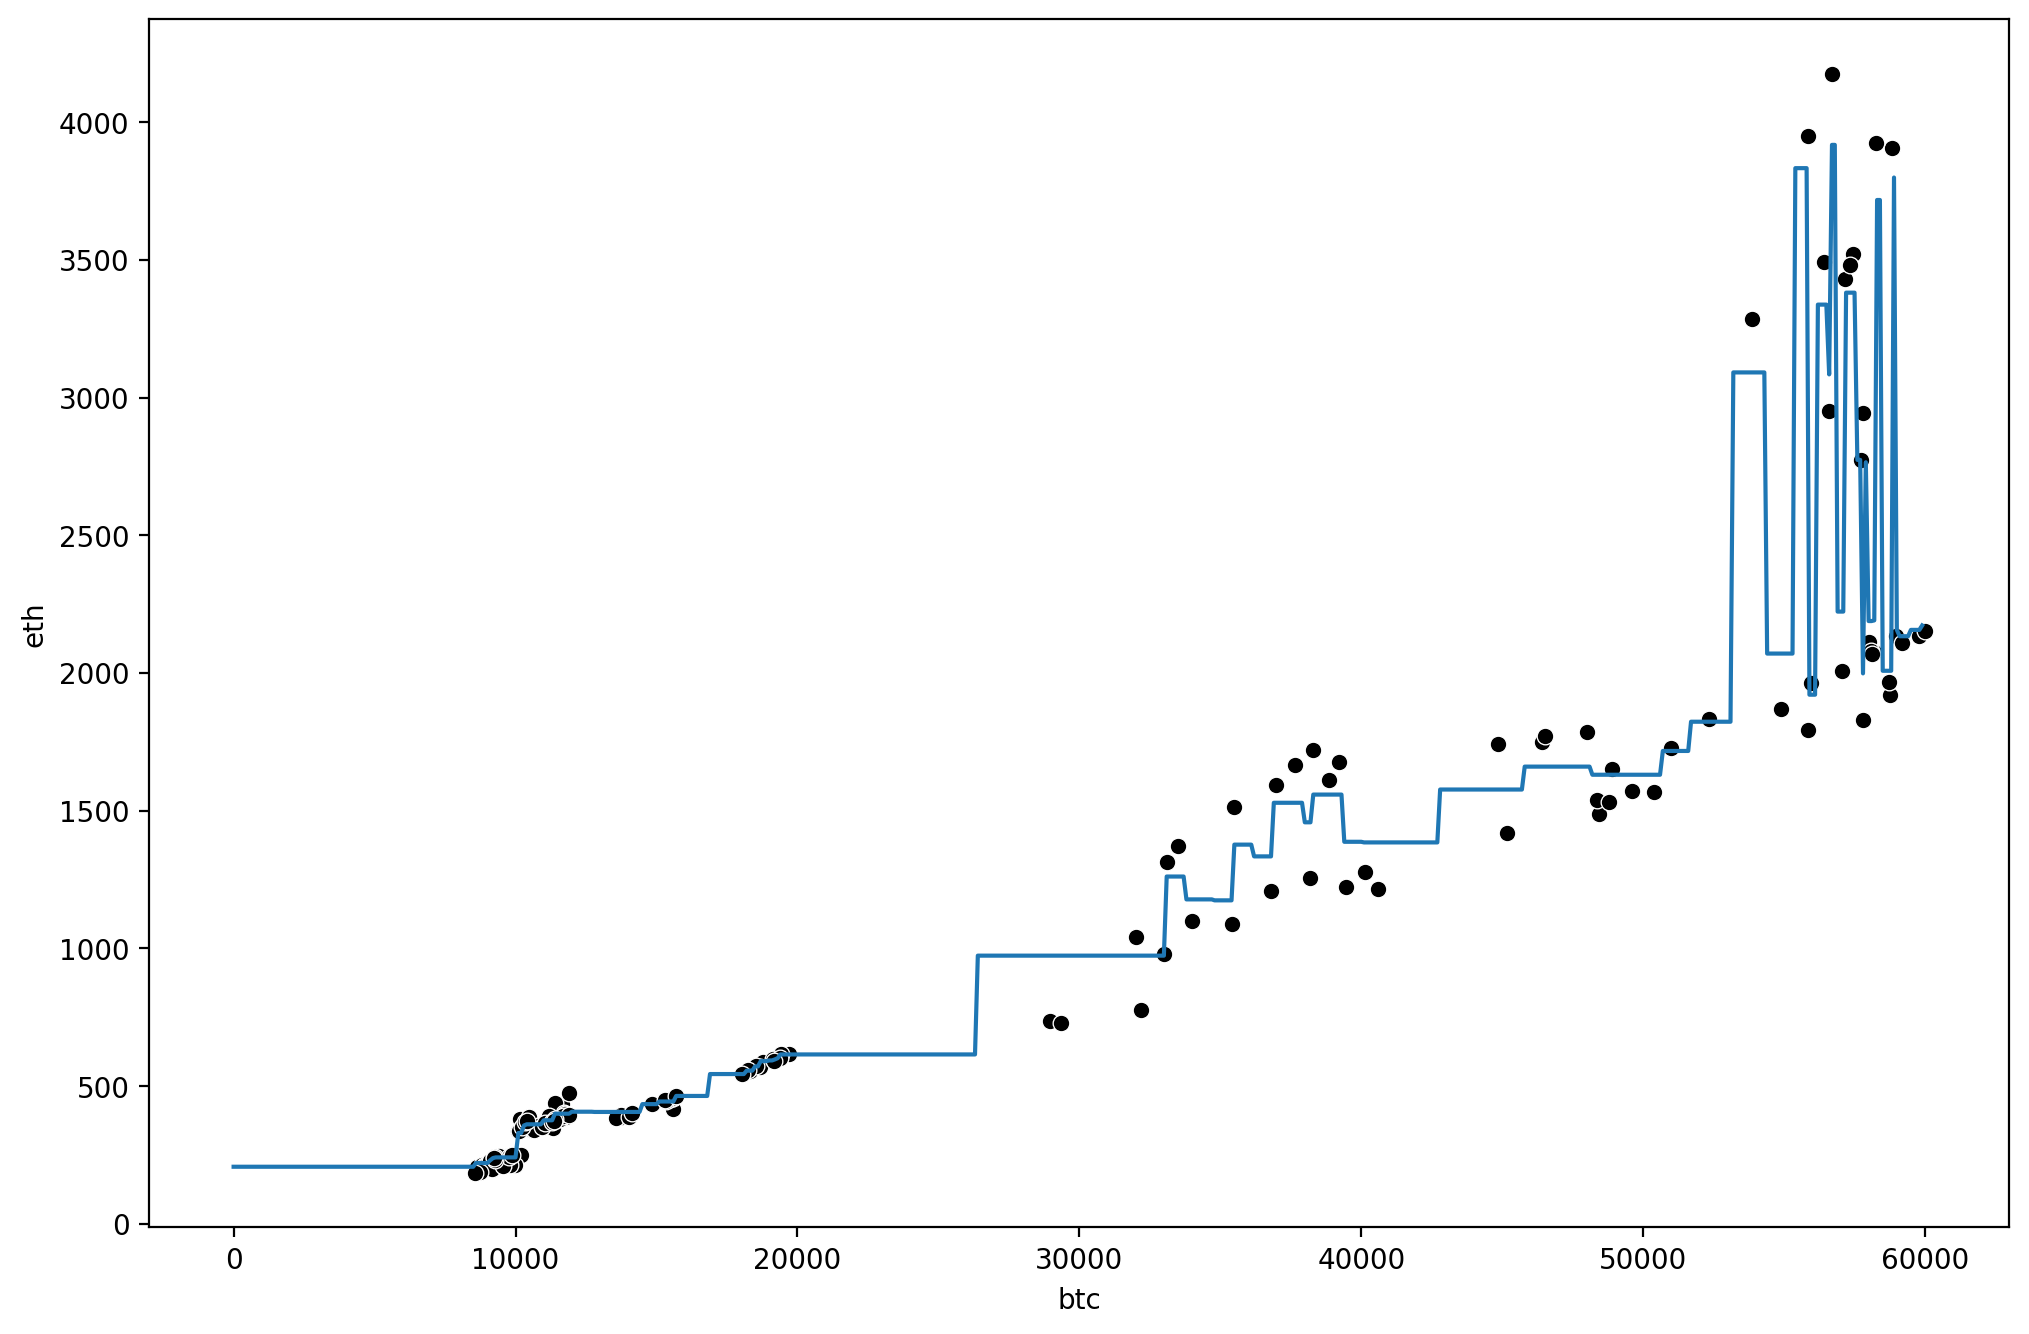

In [48]:
model = GradientBoostingRegressor()
runn(model,X_train,X_test,y_train,y_test)

### AdaBoost

RMSE : 308.7782149625955
MAE : 308.7782149625955


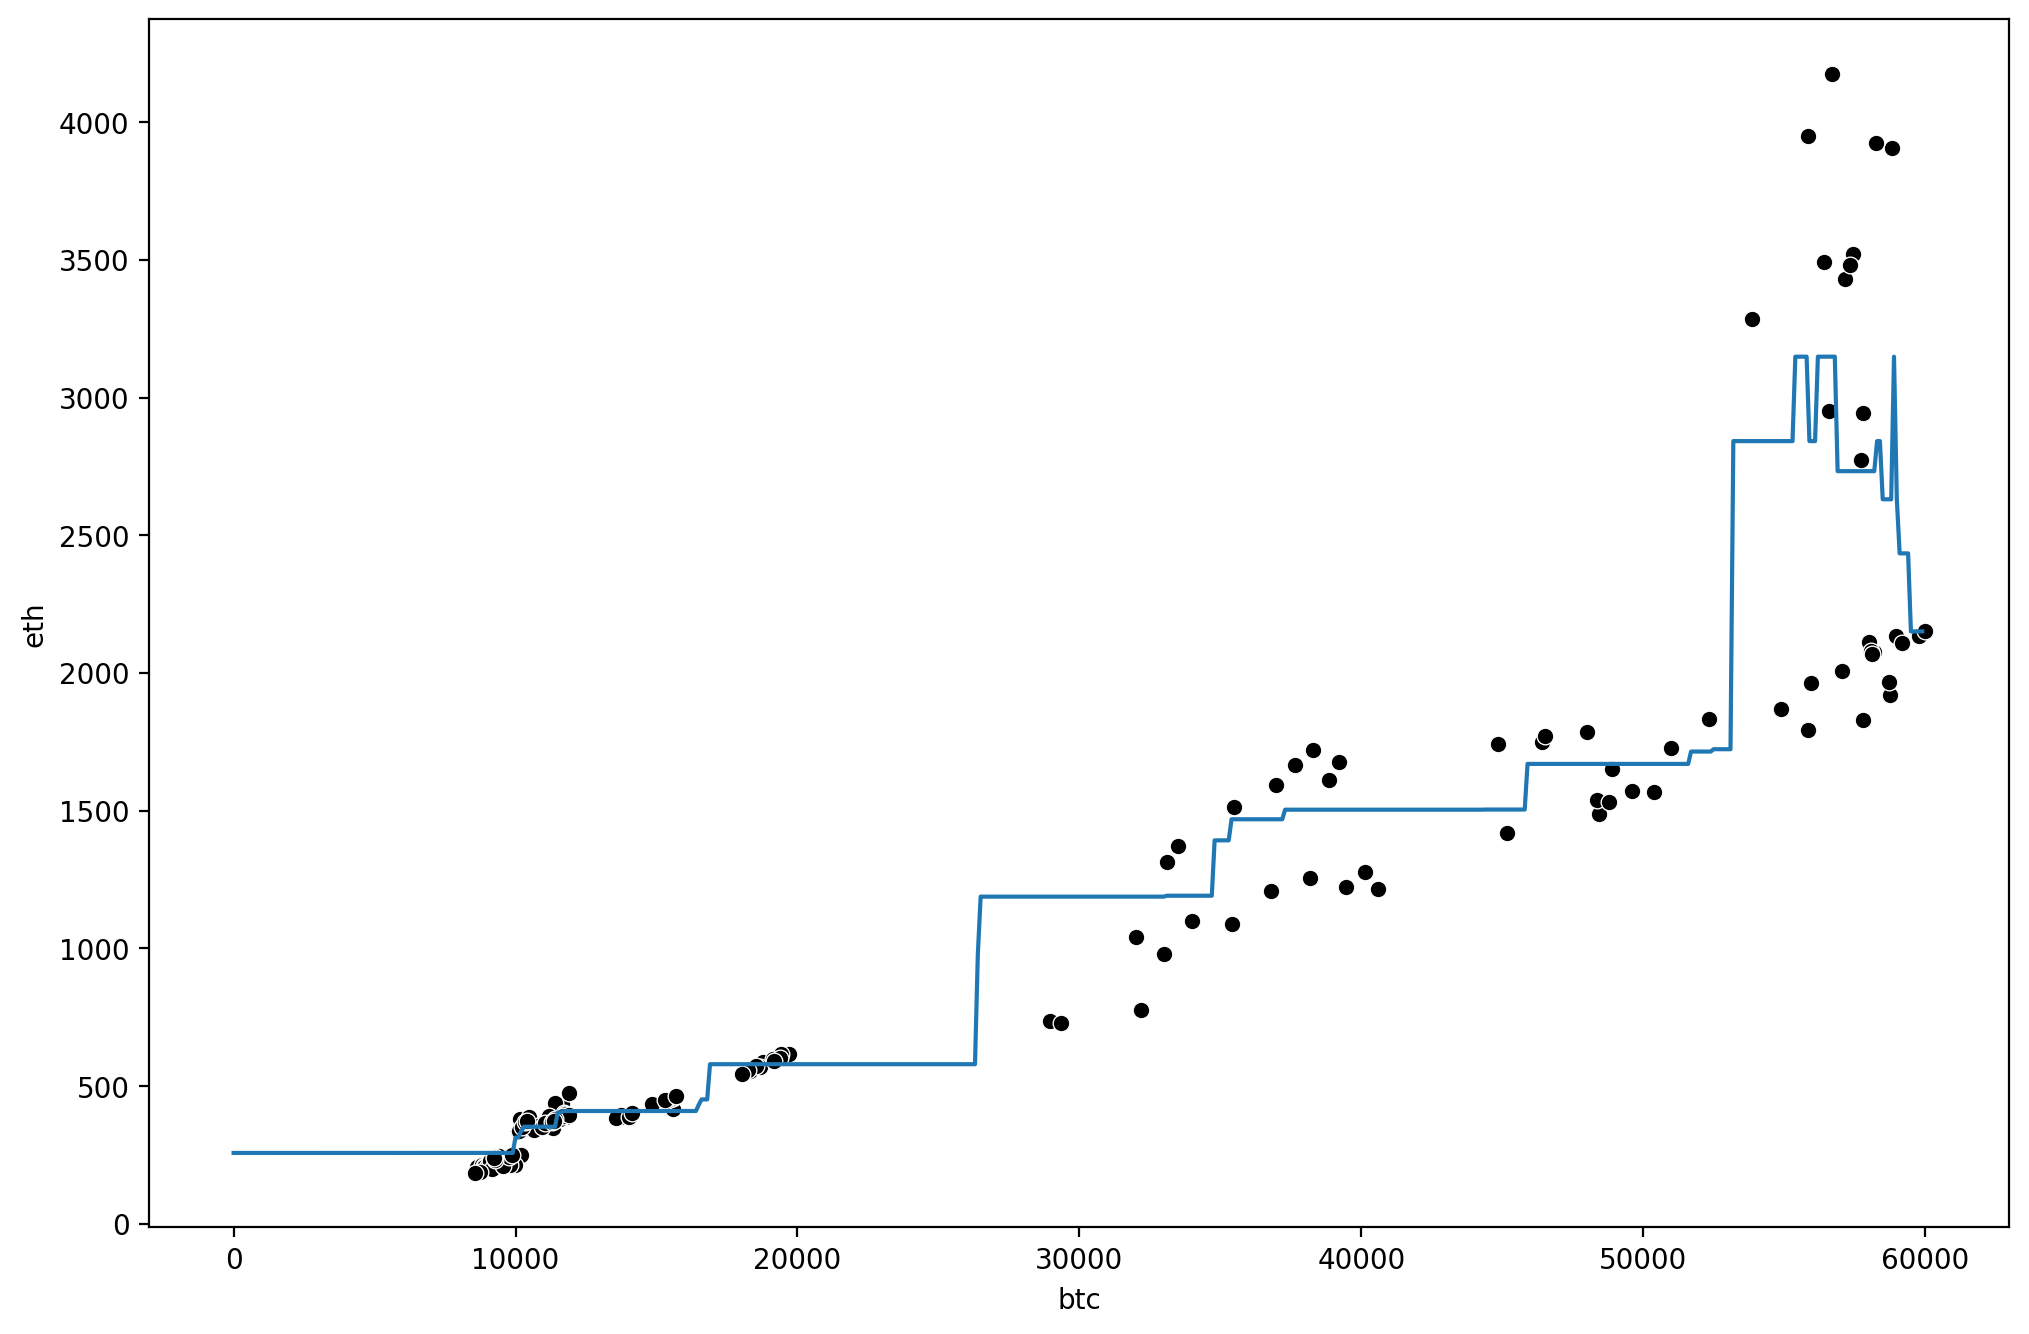

In [49]:
model = AdaBoostRegressor()
runn(model,X_train,X_test,y_train,y_test)

### Result

We examined many different regression applications. We made these analyzes with the RMSE and MAE error metrics and the graphs of the estimates. Error rates should not be considered when choosing the best method. Whether the regression curve is noisy or not is also an important criterion for selection. Overfitting and underfitting should also be considered, and in cases where there is more than one feature, hyperparameter selection and optimization should also be considered.